Connected to neurokit (Python 3.13.2)

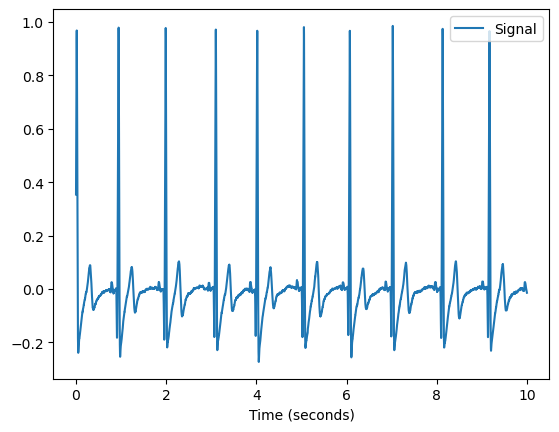

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

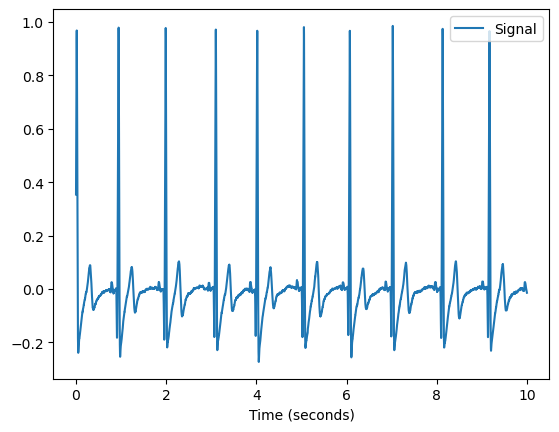

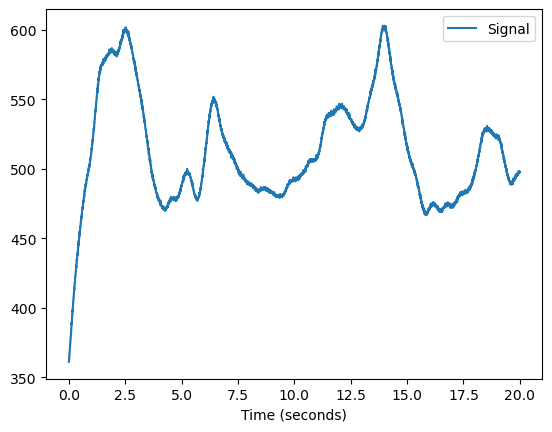

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

rsp = nk.data(dataset="rsp_1000hz")

nk.signal_plot(rsp[0:20000], sampling_rate=1000)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3614 sha256=c899ffbc23118448bd85a9273ea4e74dab8643bf06a4859a9048602eb7f5ad6f
  Stored in directory: /Users/user/Library/Caches/pip/wheels/2c/9e/6d/6c419b5fe1b720cf2f9c7b20ea119dc201878ea890ba26221f
Successfully built fastdtw


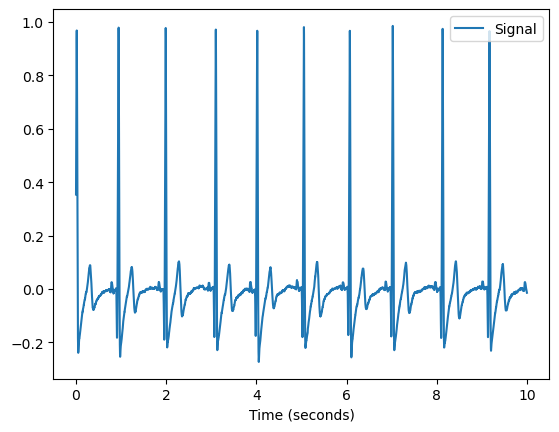

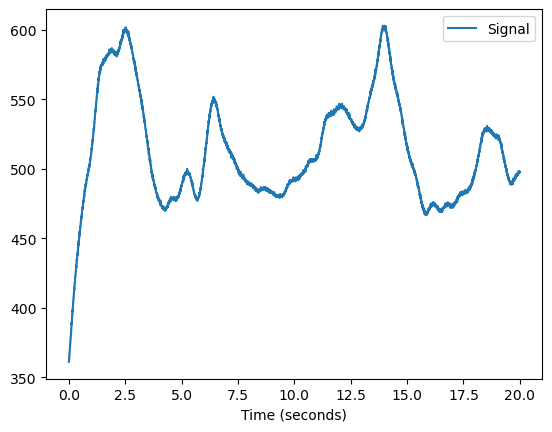

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

rsp = nk.data(dataset="rsp_1000hz")

nk.signal_plot(rsp[0:20000], sampling_rate=1000)

import sys
!{sys.executable} -m pip install fastdtw

ModuleNotFoundError: No module named 'librosa'

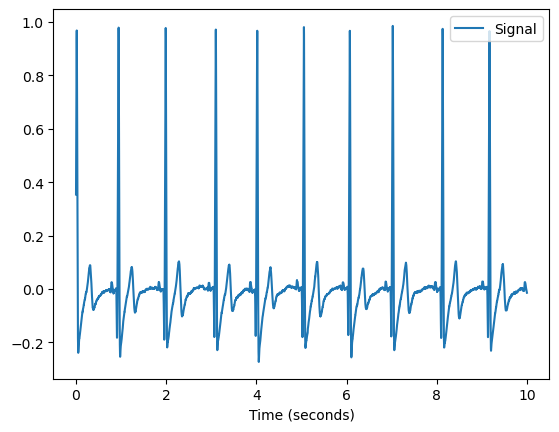

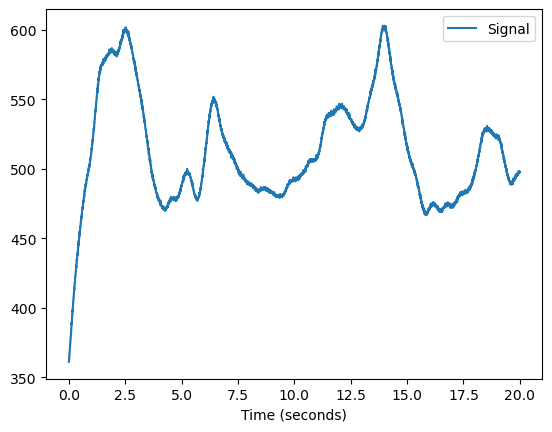

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

rsp = nk.data(dataset="rsp_1000hz")

nk.signal_plot(rsp[0:20000], sampling_rate=1000)

import sys
!{sys.executable} -m pip install fastdtw

import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import IPython.display as ipd
import librosa
import random
import math
import makelab
from makelab import audio
from makelab import signal

<>:123: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:174: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:174: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:175: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:188: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:188: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:189: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:123: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:165: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:174: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:174: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:175: SyntaxWarning: "is" with 'str' literal. Did you mean "

ModuleNotFoundError: No module named 'librosa'

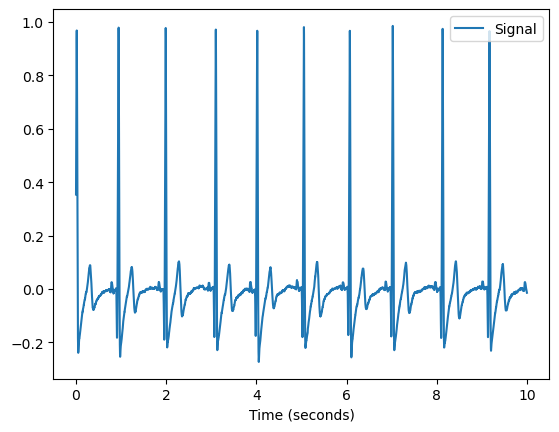

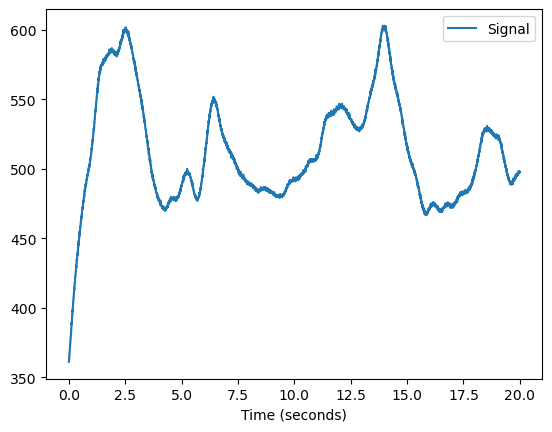

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

rsp = nk.data(dataset="rsp_1000hz")

nk.signal_plot(rsp[0:20000], sampling_rate=1000)

import sys
!{sys.executable} -m pip install fastdtw

import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import IPython.display as ipd
import librosa
import random
import math
import makelab
from makelab import audio
from makelab import signal

def pad_zeros_right(s, padding_length):
    # https://numpy.org/doc/1.18/reference/generated/numpy.pad.html
    return np.pad(s, (0, padding_length), mode = 'constant', constant_values=0)

def pad_mean_right(s, padding_length):
    # https://numpy.org/doc/1.18/reference/generated/numpy.pad.html
    return np.pad(s, (0, padding_length), mode = 'mean')

# def compare_and_plot_signals(a, b, distance_function = distance.euclidean, alignment_function = None):
def plot_signals_with_alignment(a, b, pad_function = None):
    if(len(a) != len(b) and pad_function is None):
        raise Exception(f"Signal 'a' and 'b' must be the same size; len(a)={len(a)} and len(b)={len(b)} or pad_function must not be None")
    elif(len(a) != len(b) and pad_function is not None):
        if(len(a) < len(b)):
            a = pad_function(a, len(b) - len(a))
        else:
            b = pad_function(b, len(a) - len(b))
    
    correlate_result = np.correlate(a, b, 'full')
    shift_positions = np.arange(-len(a) + 1, len(b))
    
    print("len(a)", len(a), "len(b)", len(b), "len(correlate_result)", len(correlate_result))

    fig, axes = plt.subplots(5, 1, figsize=(10, 18))
    
    axes[0].plot(a, alpha=0.7, label="a", marker="o")
    axes[0].plot(b, alpha=0.7, label="b", marker="D")
    axes[0].legend()
    axes[0].set_title("Raw Signals 'a' and 'b'")
    
    if len(shift_positions) < 20:
        # useful for debugging and showing correlation results
        print(shift_positions)
        print(correlate_result)

    best_correlation_index = np.argmax(correlate_result)
    shift_amount_debug = shift_positions[best_correlation_index]
    shift_amount = (-len(a) + 1) + best_correlation_index
    print("best_correlation_index", best_correlation_index, "shift_amount_debug", shift_amount_debug, "shift_amount", shift_amount)
    
    axes[1].stem(shift_positions, correlate_result, use_line_collection=True, label="Cross-correlation of a and b")
    axes[1].set_title(f"Cross-Correlation Result | Best Match Index: {best_correlation_index} Signal 'b' Shift Amount: {shift_amount}")
    axes[1].set_ylabel("Cross Correlation")
    axes[1].set_xlabel("'b' Signal Shift Amount")
    
    best_match_ymin = 0
    best_match_ymin_normalized = makelab.signal.map(best_match_ymin, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    best_match_ymax = correlate_result[best_correlation_index]
    best_match_ymax_normalized = makelab.signal.map(best_match_ymax, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    axes[1].axvline(shift_positions[best_correlation_index], ymin=best_match_ymin_normalized, ymax=best_match_ymax_normalized, 
                    linewidth=2, color='orange', alpha=0.8, linestyle='-.', 
                    label=f"Best match ({shift_amount}, {best_match_ymax:.2f})")
    axes[1].legend()
    
    b_shifted_mean_fill = makelab.signal.shift_array(b, shift_amount, np.mean(b))
    axes[2].plot(a, alpha=0.7, label="a", marker="o")
    axes[2].plot(b_shifted_mean_fill, alpha=0.7, label="b_shifted_mean_fill", marker="D")
    axes[2].legend()
    axes[2].set_title("Signals 'a' and 'b_shifted_mean_fill'")
    
    b_shifted_zero_fill = makelab.signal.shift_array(b, shift_amount, 0)
    axes[3].plot(a, alpha=0.7, label="a", marker="o")
    axes[3].plot(b_shifted_zero_fill, alpha=0.7, label="b_shifted_zero_fill", marker="D")
    axes[3].legend()
    axes[3].set_title("Signals 'a' and 'b_shifted_zero_fill'")
    
    b_shifted_roll = np.roll(b, shift_amount)
    axes[4].plot(a, alpha=0.7, label="a", marker="o")
    axes[4].plot(b_shifted_roll, alpha=0.7, label="b_shifted_roll", marker="D")
    axes[4].legend()
    axes[4].set_title("Signals 'a' and 'b_shifted_roll'")
    
    fig.tight_layout()
    
def compare_and_plot_signals_with_alignment(a, b, bshift_method = 'mean_fill', pad_function = None):
    '''Aligns signals using cross correlation and then plots
    
       bshift_method can be: 'mean_fill', 'zero_fill', 'roll', or 'all'. Defaults to 'mean_fill'
    '''
    
    if(len(a) != len(b) and pad_function is None):
        raise Exception(f"Signal 'a' and 'b' must be the same size; len(a)={len(a)} and len(b)={len(b)} or pad_function must not be None")
    elif(len(a) != len(b) and pad_function is not None):
        if(len(a) < len(b)):
            a = pad_function(a, len(b) - len(a))
        else:
            b = pad_function(b, len(a) - len(b))
    
    correlate_result = np.correlate(a, b, 'full')
    shift_positions = np.arange(-len(a) + 1, len(b))
    print("len(a)", len(a), "len(b)", len(b), "len(correlate_result)", len(correlate_result))
    
    euclid_distance_a_to_b = distance.euclidean(a, b)
    
    num_charts = 3
    chart_height = 3.6
    if bshift_method is 'all':
        num_charts = 5
    
    fig, axes = plt.subplots(num_charts, 1, figsize=(10, num_charts * chart_height))
    
    # Turn on markers only if < 50 points
    a_marker = None
    b_marker = None
    if len(a) < 50:
        a_marker = "o"
        b_marker = "D"
        
    axes[0].plot(a, alpha=0.7, label="a", marker=a_marker)
    axes[0].plot(b, alpha=0.7, label="b", marker=b_marker)
    axes[0].legend()
    axes[0].set_title(f"Raw Signals | Euclidean Distance From 'a' to 'b' = {euclid_distance_a_to_b:.2f}")
    
    if len(shift_positions) < 20:
        # useful for debugging and showing correlation results
        print(shift_positions)
        print(correlate_result)
    
    best_correlation_index = np.argmax(correlate_result)
    shift_amount_debug = shift_positions[best_correlation_index]
    shift_amount = (-len(a) + 1) + best_correlation_index
    print("best_correlation_index", best_correlation_index, "shift_amount_debug", shift_amount_debug, "shift_amount", shift_amount)
    
    #axes[1].plot(shift_positions, correlate_result)
    axes[1].stem(shift_positions, correlate_result, use_line_collection=True, label="Cross-correlation of a and b")
    axes[1].set_title(f"Cross-correlation result | Best match index: {best_correlation_index}; Signal 'b' shift amount: {shift_amount}")
    axes[1].set_ylabel("Cross Correlation")
    axes[1].set_xlabel("'b' Signal Shift Amount")
    
    best_match_ymin = 0
    best_match_ymin_normalized = makelab.signal.map(best_match_ymin, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    best_match_ymax = correlate_result[best_correlation_index]
    best_match_ymax_normalized = makelab.signal.map(best_match_ymax, axes[1].get_ylim()[0], axes[1].get_ylim()[1], 0, 1)
    axes[1].axvline(shift_positions[best_correlation_index], ymin=best_match_ymin_normalized, ymax=best_match_ymax_normalized, 
                    linewidth=2, color='orange', alpha=0.8, linestyle='-.', 
                    label=f"Best match ({shift_amount}, {best_match_ymax:.2f})")
    axes[1].legend()
    
    if bshift_method is 'mean_fill' or bshift_method is 'all':
        b_shifted_mean_fill = makelab.signal.shift_array(b, shift_amount, np.mean(b))
        euclid_distance_a_to_b_shifted_mean_fill = distance.euclidean(a, b_shifted_mean_fill)
        axes[2].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[2].plot(b_shifted_mean_fill, alpha=0.7, label="b_shifted_mean_fill", marker=b_marker)
        axes[2].legend()
        axes[2].set_title(f"Euclidean distance From 'a' to 'b_shifted_mean_fill' = {euclid_distance_a_to_b_shifted_mean_fill:.2f}")
    
    ax_idx = 0
    if bshift_method is 'zero_fill' or bshift_method is 'all':
        if bshift_method is 'zero_fill':
            ax_idx = 2
        else:
            ax_idx = 3
    
        b_shifted_zero_fill = makelab.signal.shift_array(b, shift_amount, 0)
        euclid_distance_a_to_b_shifted_zero_fill = distance.euclidean(a, b_shifted_zero_fill)
        axes[ax_idx].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[ax_idx].plot(b_shifted_zero_fill, alpha=0.7, label="b_shifted_zero_fill", marker=b_marker)
        axes[ax_idx].legend()
        axes[ax_idx].set_title(f"Euclidean distance From 'a' to 'b_shifted_zero_fill' = {euclid_distance_a_to_b_shifted_zero_fill:.2f}")
    
    
    if bshift_method is 'roll' or bshift_method is 'all':
        if bshift_method is 'roll':
            ax_idx = 2
        else:
            ax_idx = 4
        b_shifted_roll = np.roll(b, shift_amount)
        euclid_distance_a_to_b_shifted_roll = distance.euclidean(a, b_shifted_roll)
        axes[ax_idx].plot(a, alpha=0.7, label="a", marker=a_marker)
        axes[ax_idx].plot(b_shifted_roll, alpha=0.7, label="b_shifted_roll", marker=b_marker)
        axes[ax_idx].legend()
        axes[ax_idx].set_title(f"Euclidean distance From 'a' to 'b_shifted_roll' = {euclid_distance_a_to_b_shifted_roll:.2f}")
    
    fig.tight_layout()

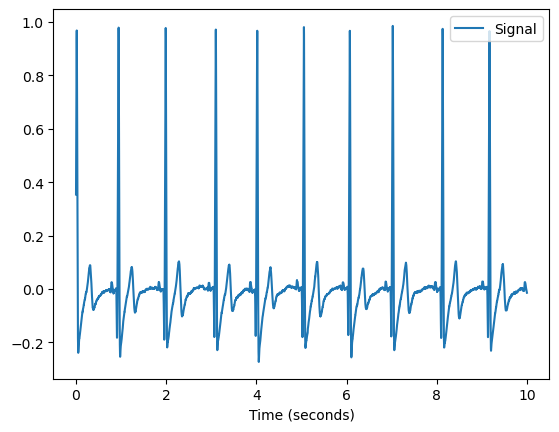

In [ ]:
import neurokit2 as nk

ecg = nk.data(dataset="ecg_1000hz")

nk.signal_plot(ecg[0:10000], sampling_rate=1000)

<Axes: >

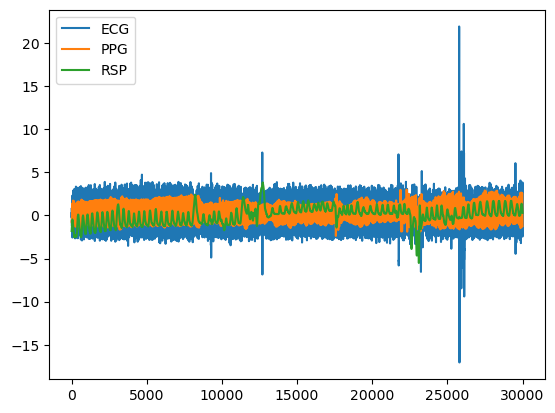

In [ ]:
data = nk.data(dataset="bio_resting_5min_100hz")

nk.standardize(data).plot()

In [ ]:
data = nk.data("bio_resting_8min_200hz")

data.keys()
dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()

NameError: name 'dict_keys' is not defined

In [ ]:
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()

ECG       RSP  PhotoSensor Participant
0  2.394536e-19  5.010681          5.0         S01
1  1.281743e-02  5.011291          5.0         S01
2  1.129138e-02  5.010376          5.0         S01
3  7.629118e-04  5.010681          5.0         S01
4 -4.119742e-03  5.010986          5.0         S01

In [ ]:
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
plot(data["S01"])

NameError: name 'plot' is not defined

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
plot(data["S01"])

NameError: name 'plot' is not defined

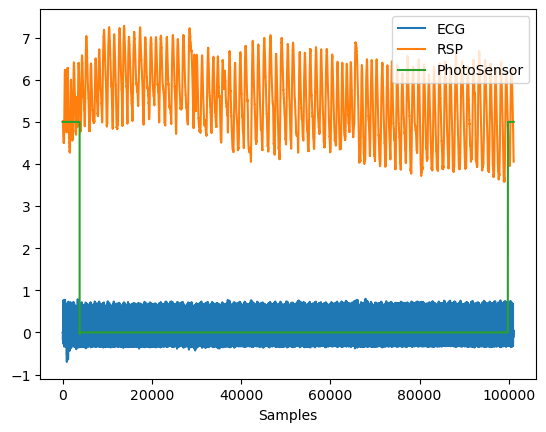

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"])

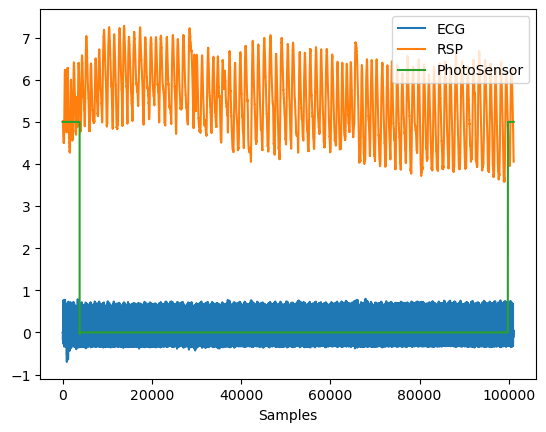

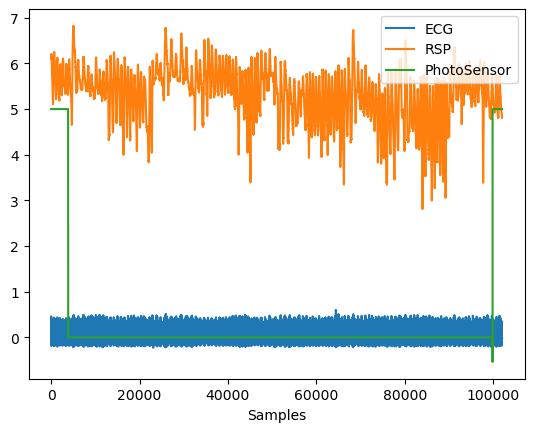

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"])
nk.signal_plot(data["S02"])

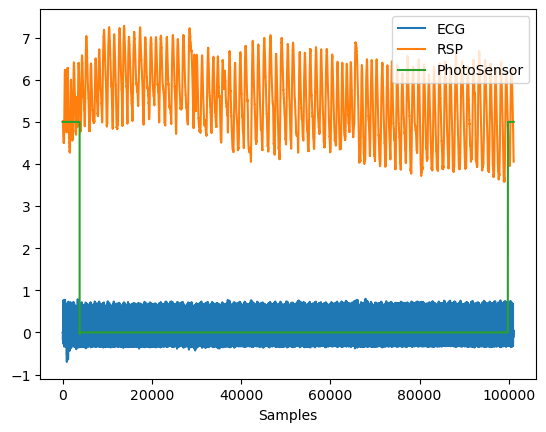

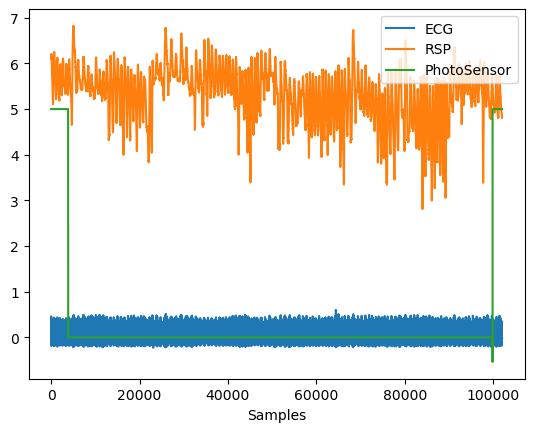

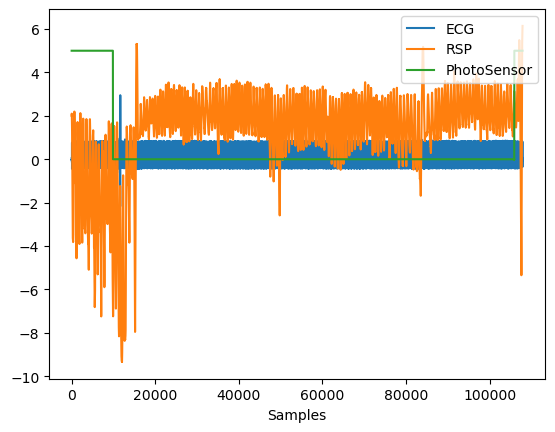

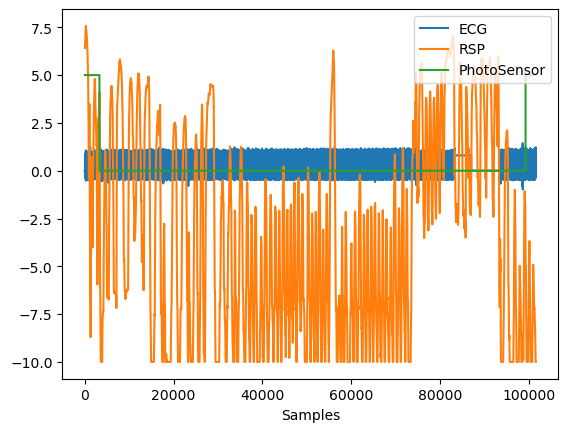

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"])
nk.signal_plot(data["S02"])
nk.signal_plot(data["S03"])
nk.signal_plot(data["S04"])

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"][ECG])
nk.signal_plot(data["S02"])
nk.signal_plot(data["S03"])
nk.signal_plot(data["S04"])

NameError: name 'ECG' is not defined

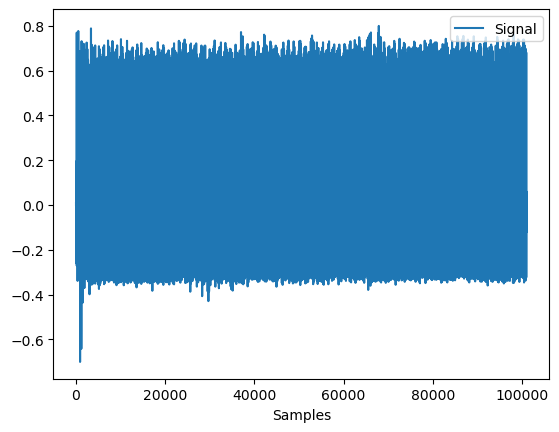

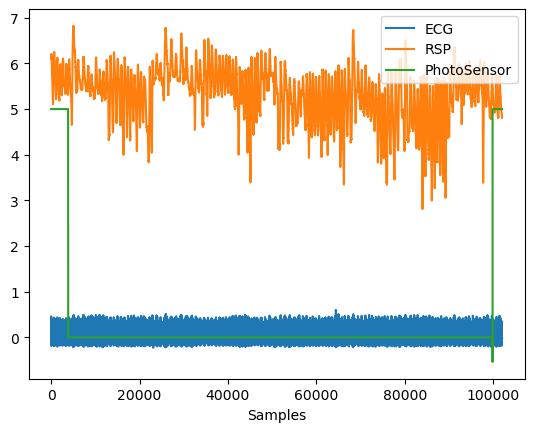

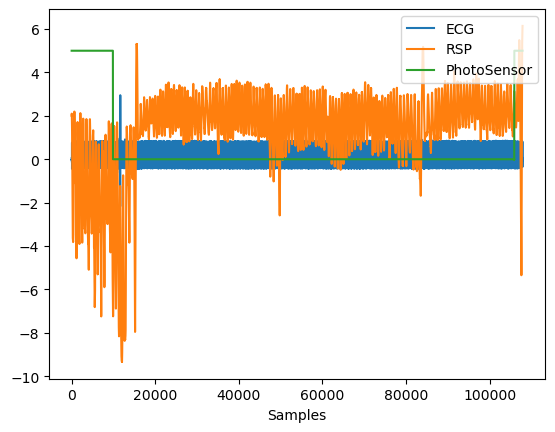

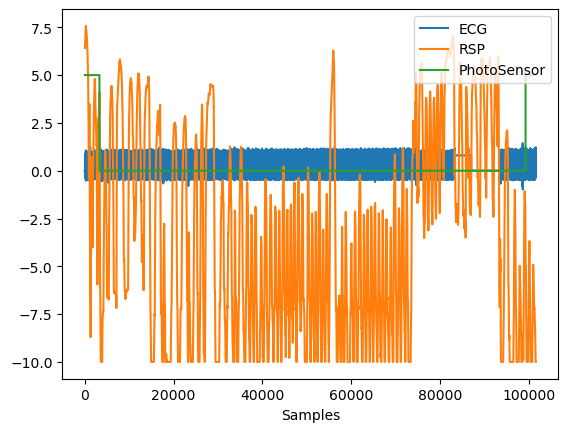

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"]["ECG"])
nk.signal_plot(data["S02"])
nk.signal_plot(data["S03"])
nk.signal_plot(data["S04"])

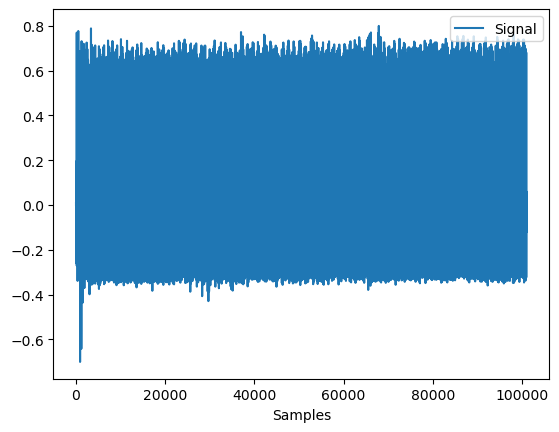

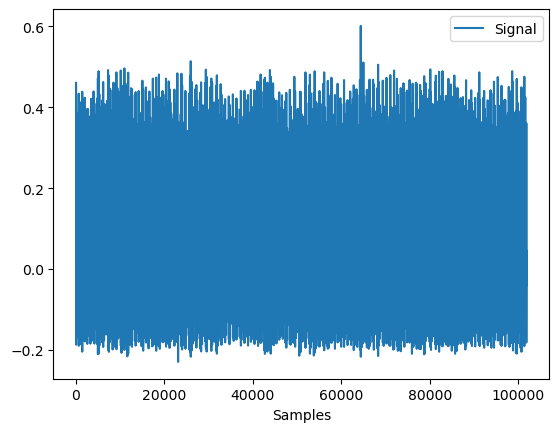

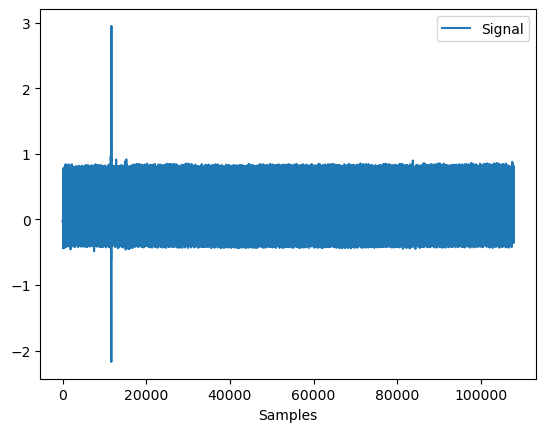

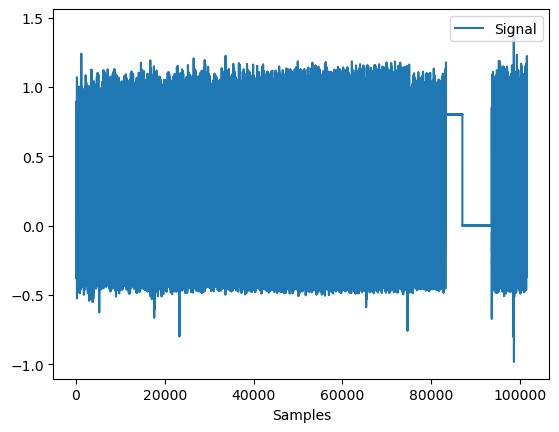

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"]["ECG"])
nk.signal_plot(data["S02"]["ECG"])
nk.signal_plot(data["S03"]["ECG"])
nk.signal_plot(data["S04"]["ECG"])

NameError: name 'hr_signal_1' is not defined

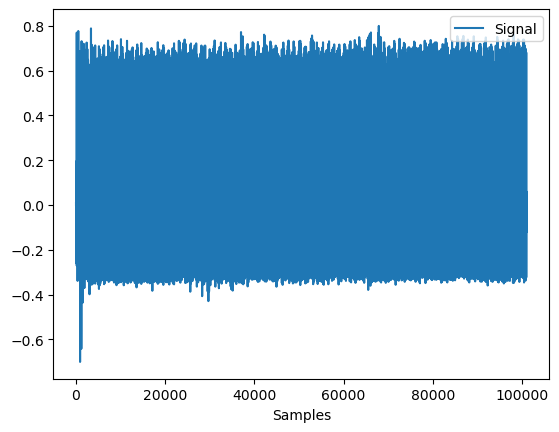

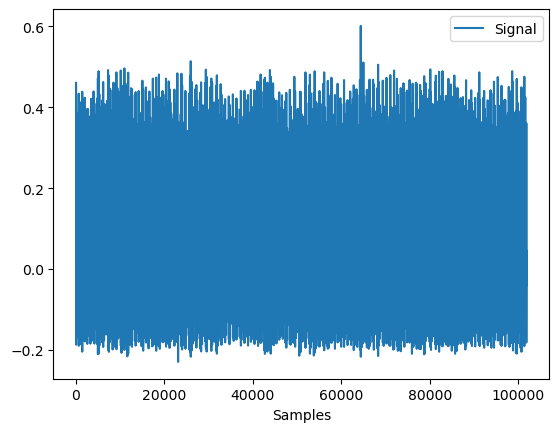

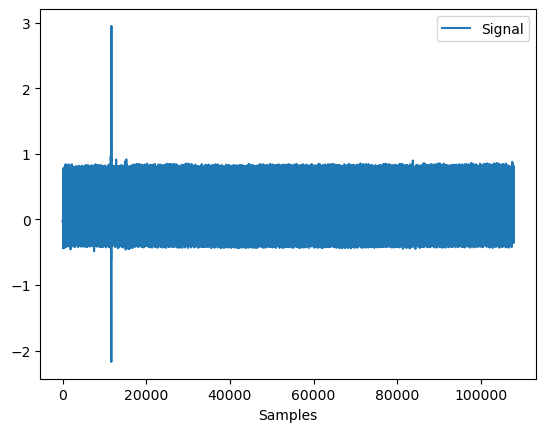

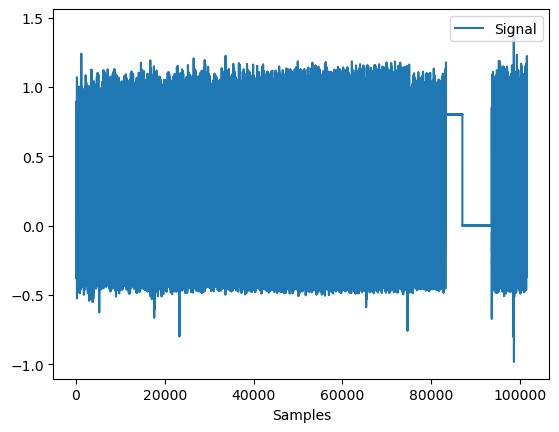

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"]["ECG"])
nk.signal_plot(data["S02"]["ECG"])
nk.signal_plot(data["S03"]["ECG"])
nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate
ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(hr_signal_1, hr_signal_2, mode='full')
correlation = correlate(hr_signal_1, hr_signal_2, mode='full')

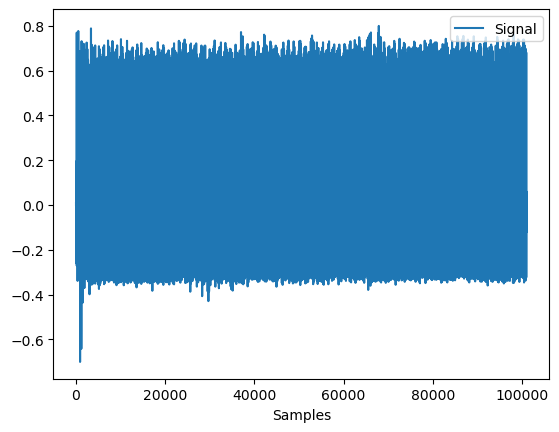

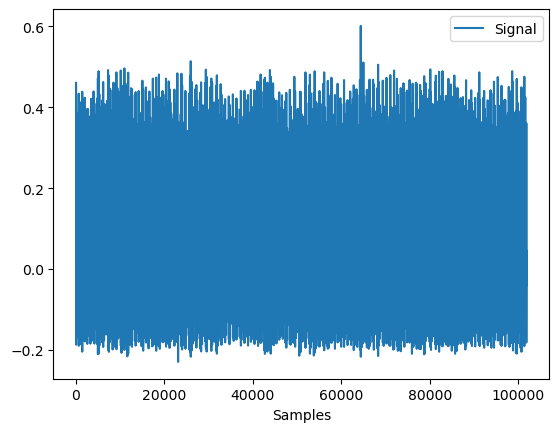

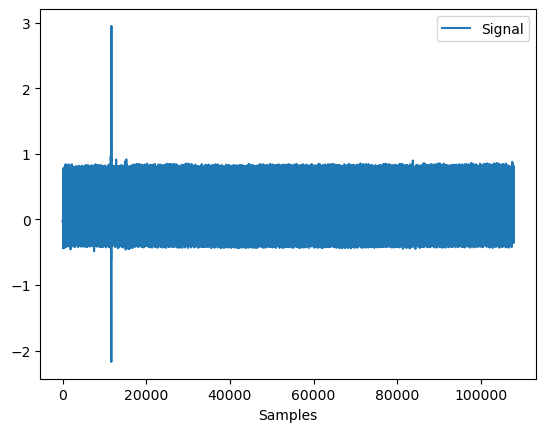

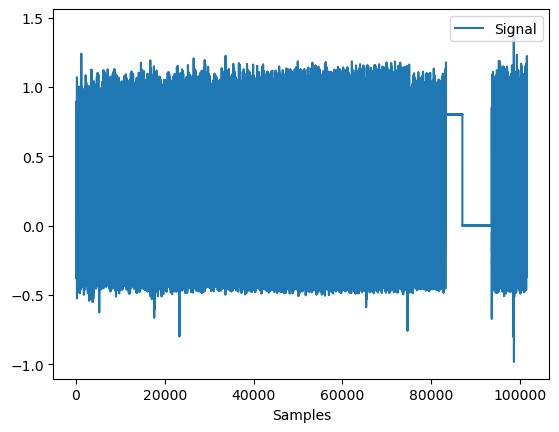

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
nk.signal_plot(data["S01"]["ECG"])
nk.signal_plot(data["S02"]["ECG"])
nk.signal_plot(data["S03"]["ECG"])
nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate
ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')
correlation = correlate(ecg_1, ecg_2, mode='full')

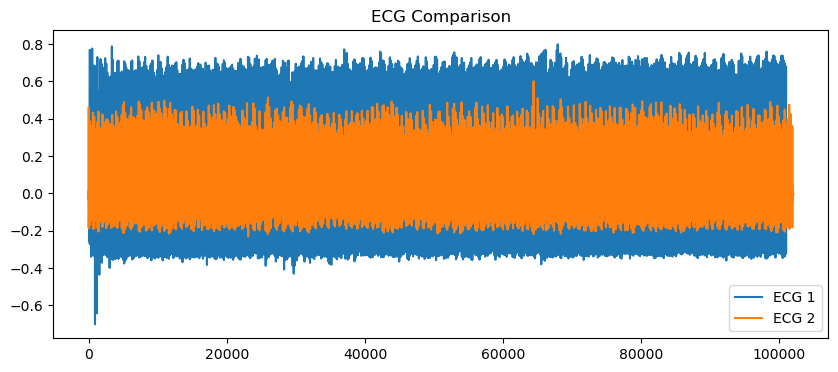

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate
ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

start_time = 0  # Start at time 0
end_time = 10   # Limit to time 10

# Find the indices where time is between 0 and 10
mask = (time >= start_time) & (time <= end_time)

# Apply the mask to filter data
time_limited = time[mask]
ecg_1_limited = ecg_1[mask]
ecg_2_limited = ecg_2[mask]

plt.figure(figsize=(10, 5))
plt.plot(time_limited, ecg_1_limited, label="ECG 1")
plt.plot(time_limited, ecg_2_limited, label="ECG 2")
plt.title("ECG Comparison (Limited Time)")
plt.xlabel("Time")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

correlation = correlate(ecg_1_limited, ecg_2_limited, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1_limited, label='ECG 1')
plt.plot(ecg_2_limited, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

NameError: name 'time' is not defined

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

start_time = 0  # Start at time 0
end_time = 10   # Limit to time 10

# Find the indices where time is between 0 and 10
mask = (time >= start_time) & (time <= end_time)

# Apply the mask to filter data
time_limited = time[mask]
ecg_1_limited = ecg_1[mask]
ecg_2_limited = ecg_2[mask]

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:1000], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:1000], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

NameError: name 'time' is not defined

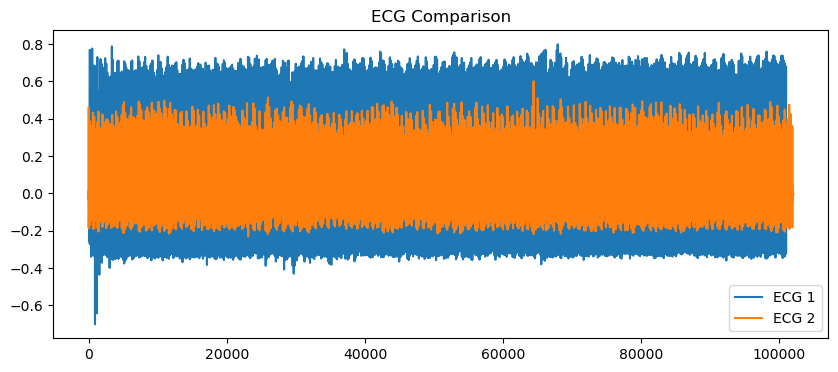

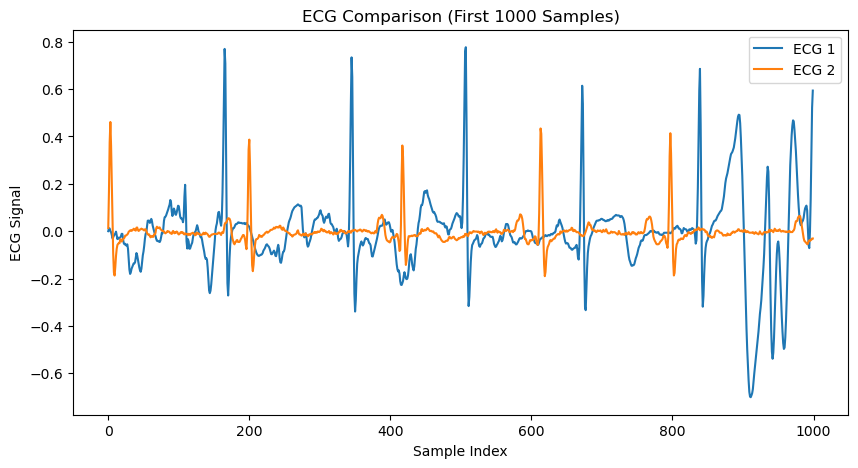

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:1000], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:1000], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

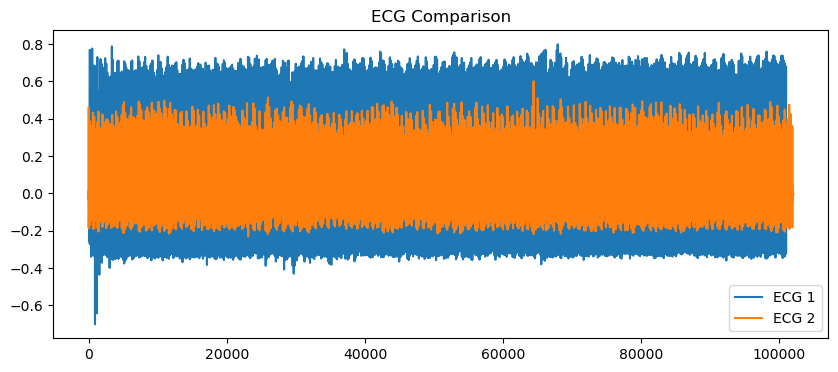

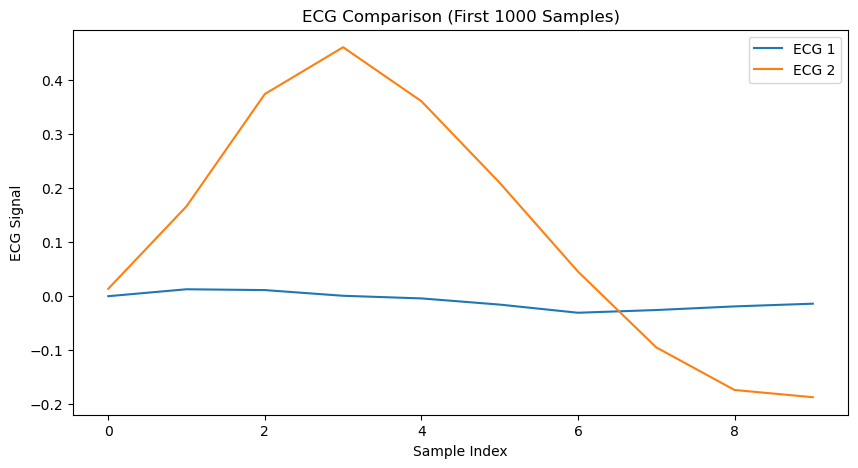

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:10], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:10], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

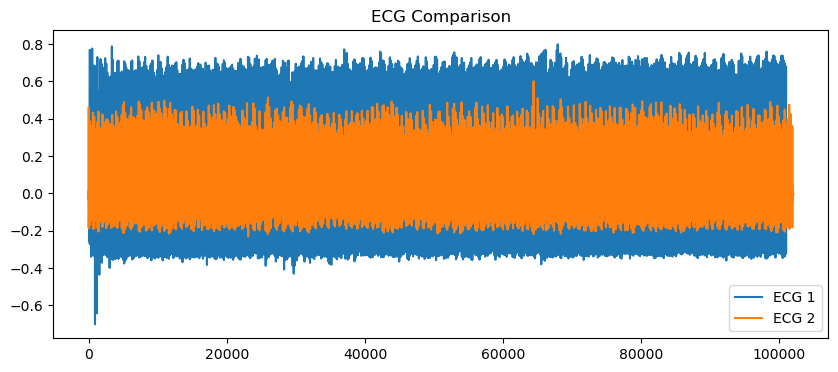

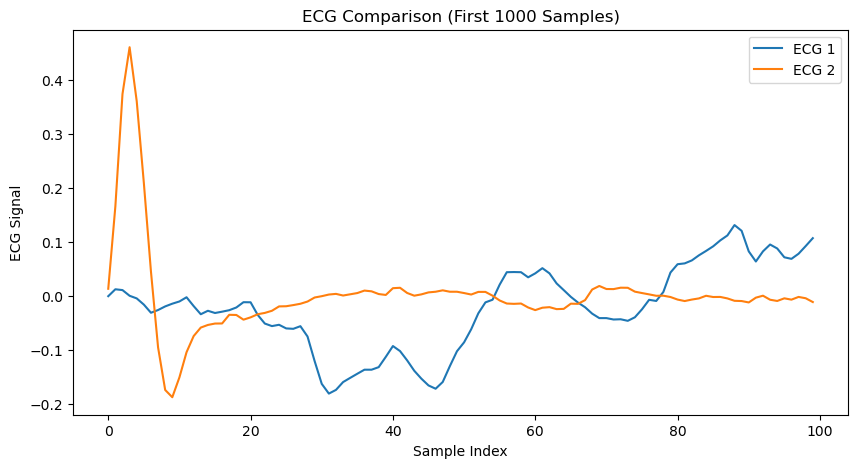

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:100], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:100], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

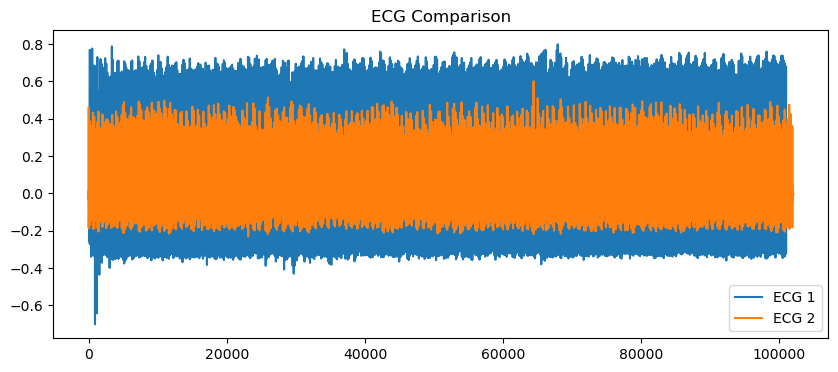

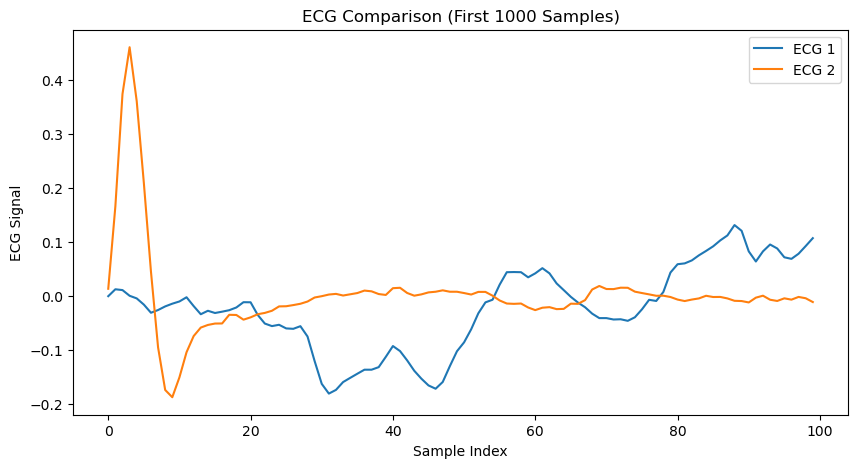

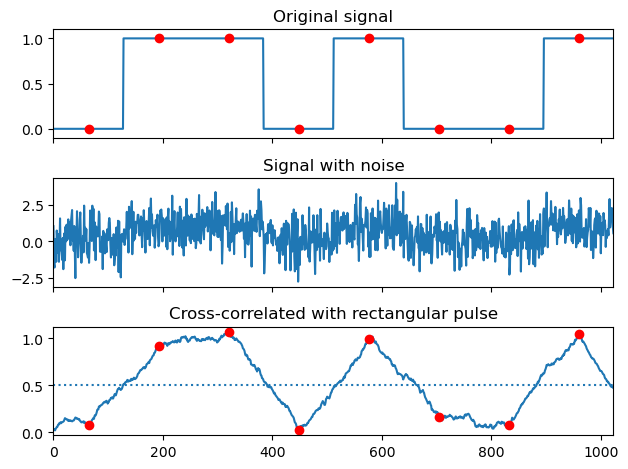

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:100], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:100], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

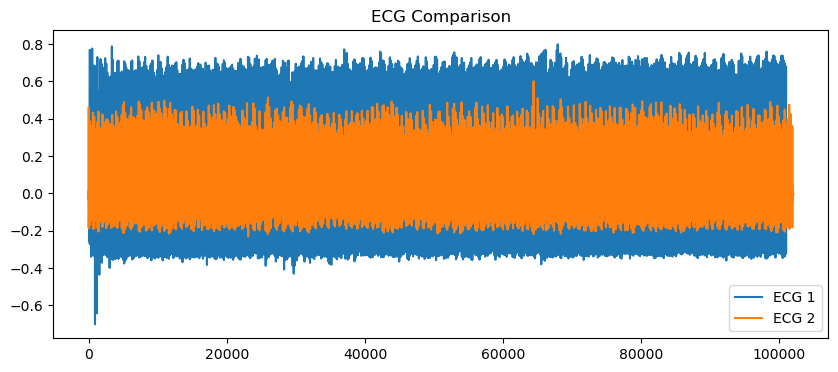

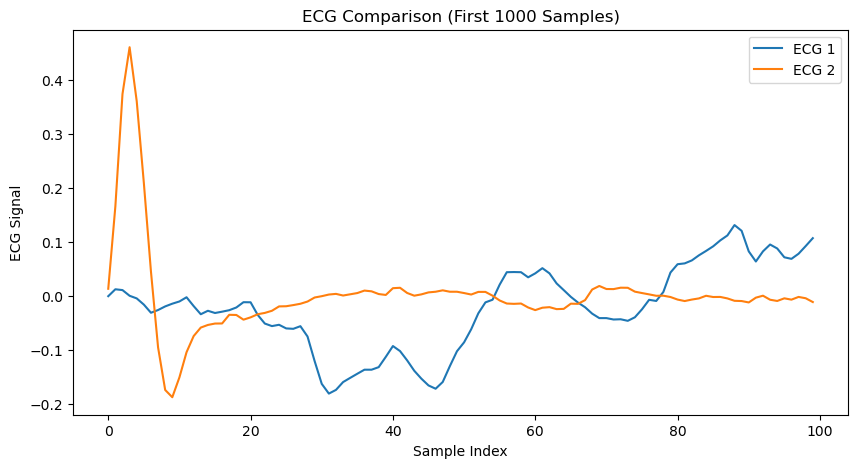

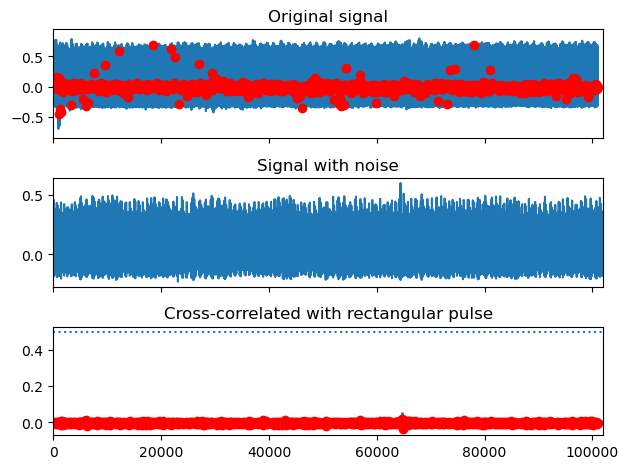

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"]
ecg_2 = data["S02"]["ECG"]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1[:100], label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2[:100], label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(128), mode='same') / 128

clock = np.arange(64, len(ecg_1), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

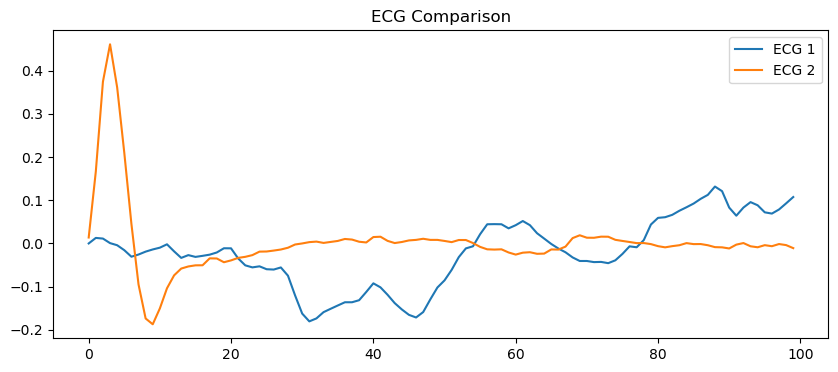

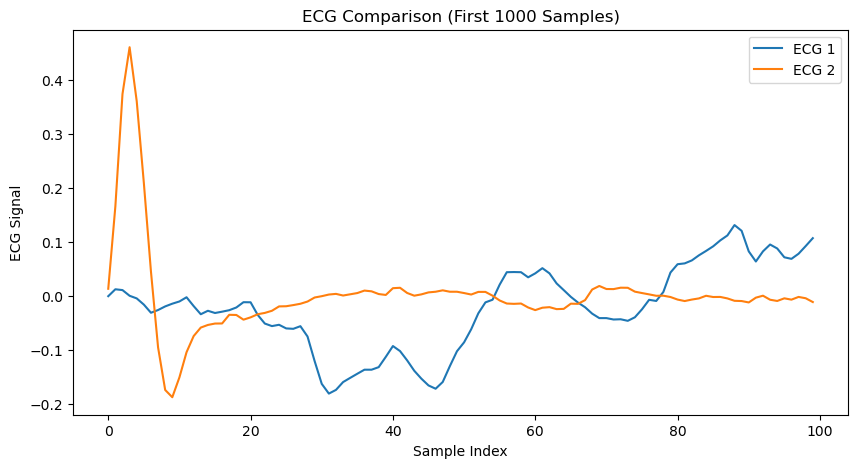

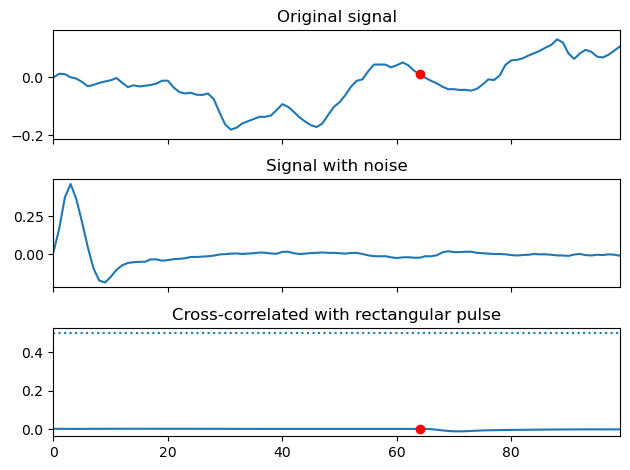

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:100]
ecg_2 = data["S02"]["ECG"][:100]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(128), mode='same') / 128

clock = np.arange(64, len(ecg_1), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

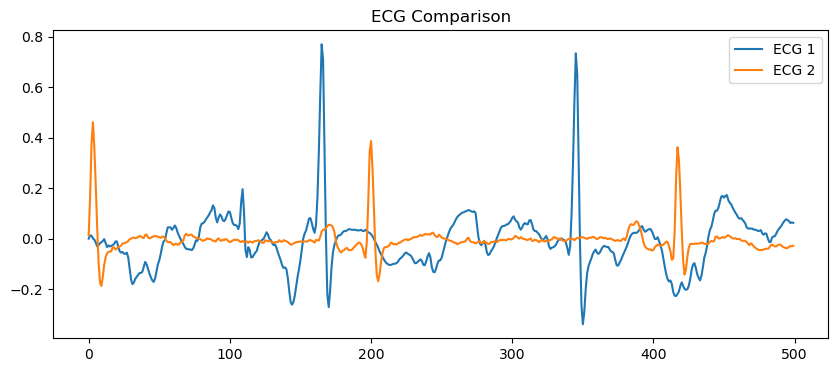

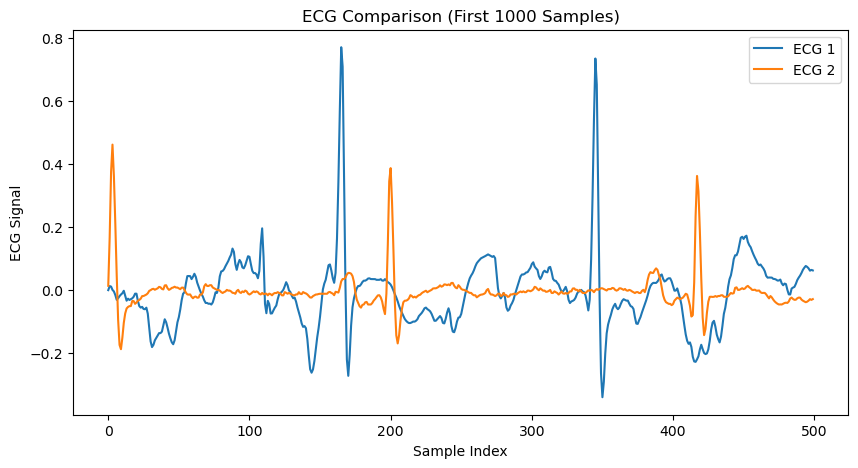

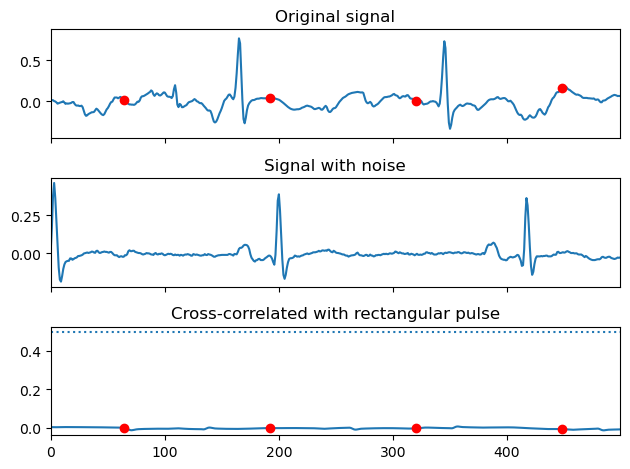

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:500]
ecg_2 = data["S02"]["ECG"][:500]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(128), mode='same') / 128

clock = np.arange(64, len(ecg_1), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

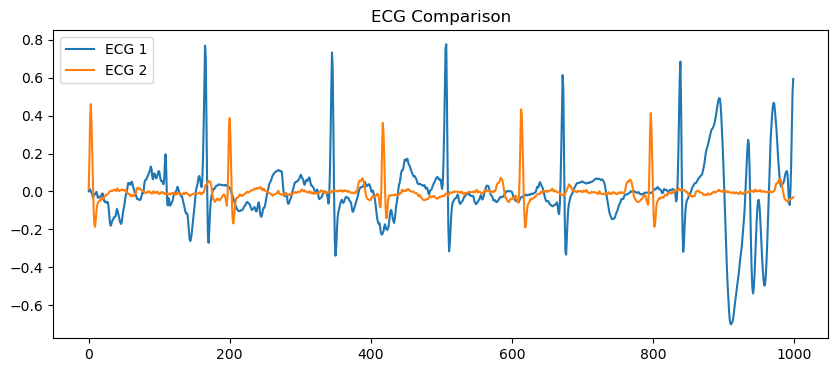

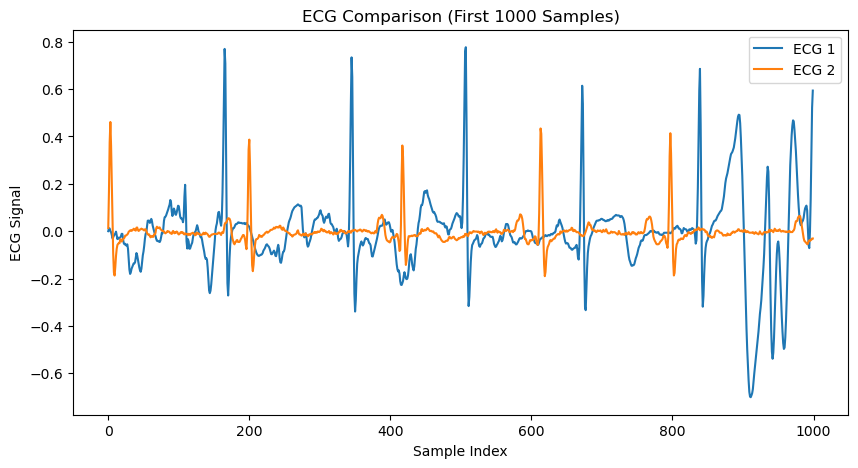

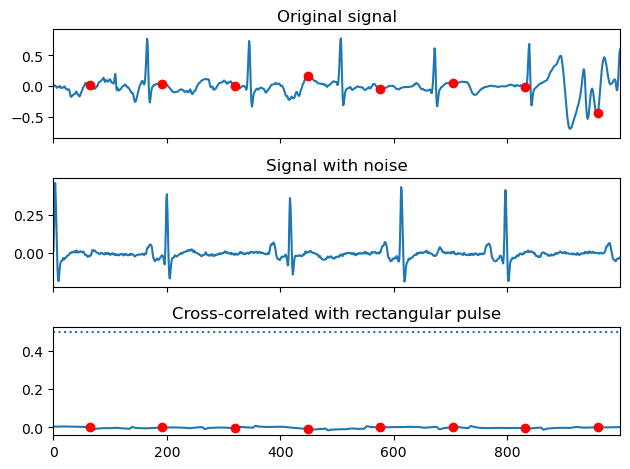

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S02"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(128), mode='same') / 128

clock = np.arange(64, len(ecg_1), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

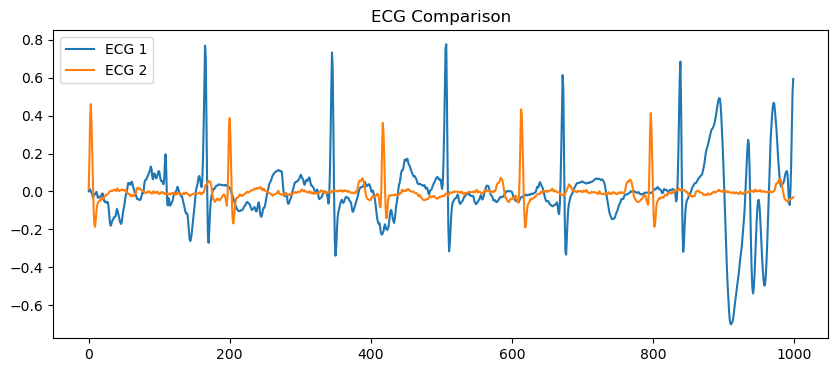

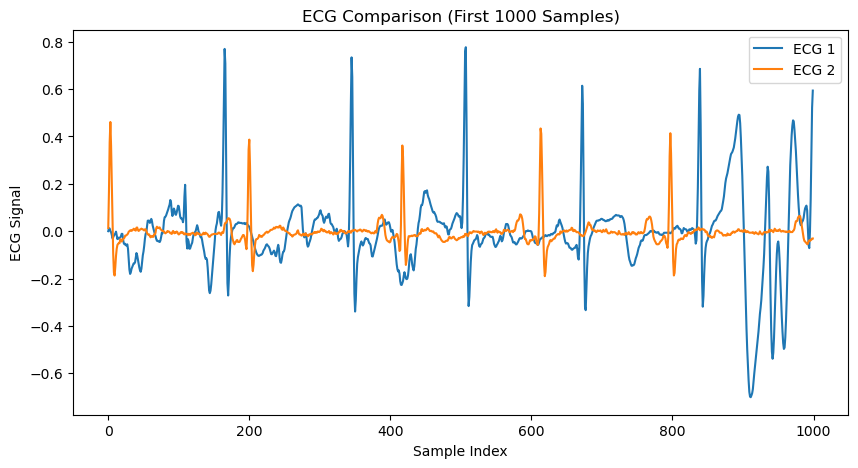

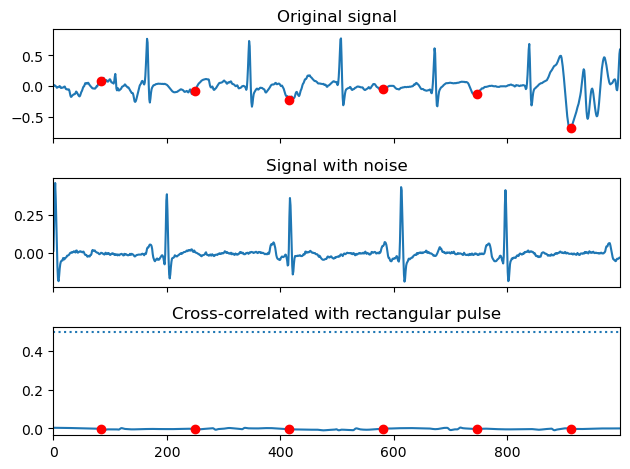

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S02"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

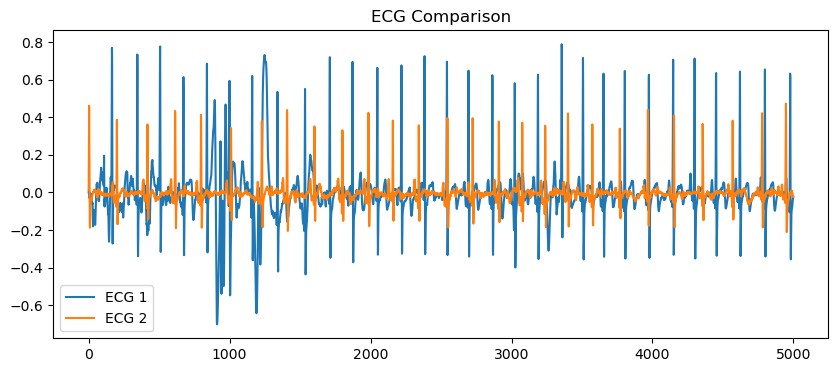

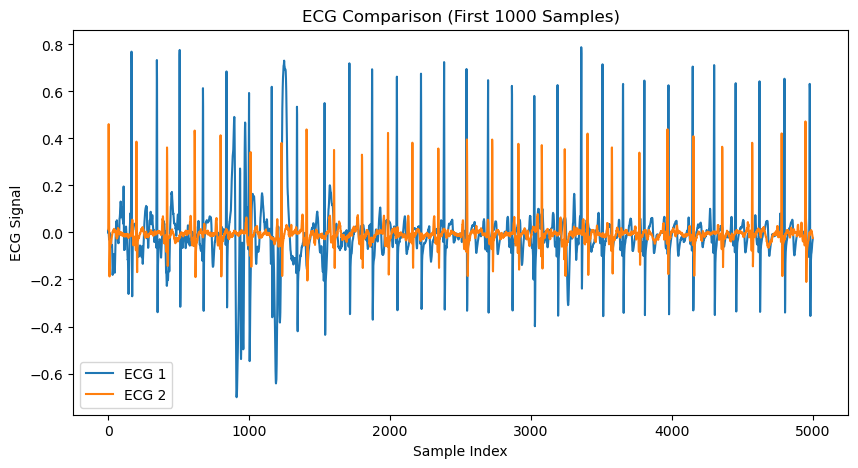

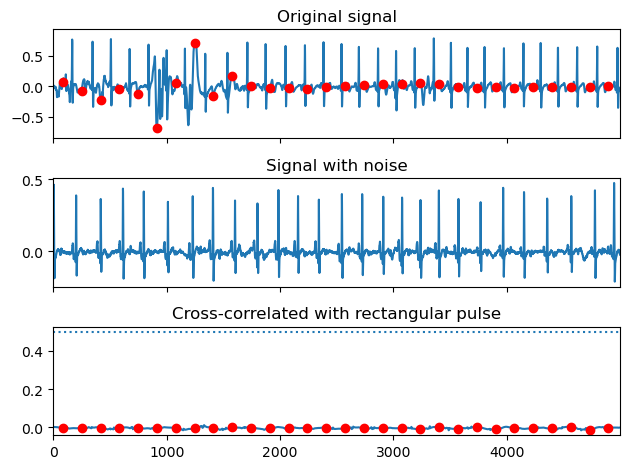

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:5000]
ecg_2 = data["S02"]["ECG"][:5000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

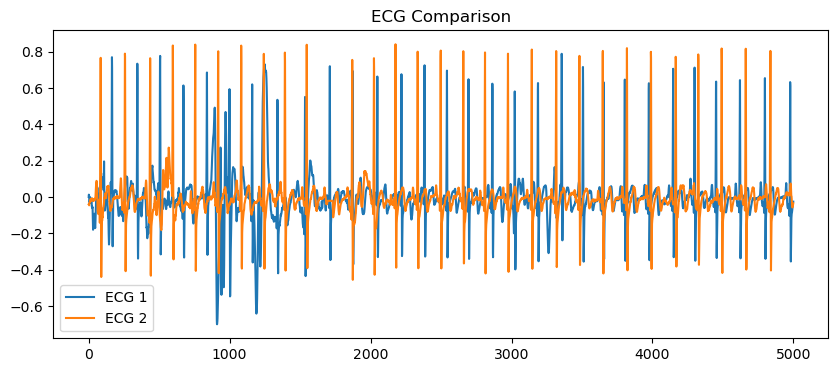

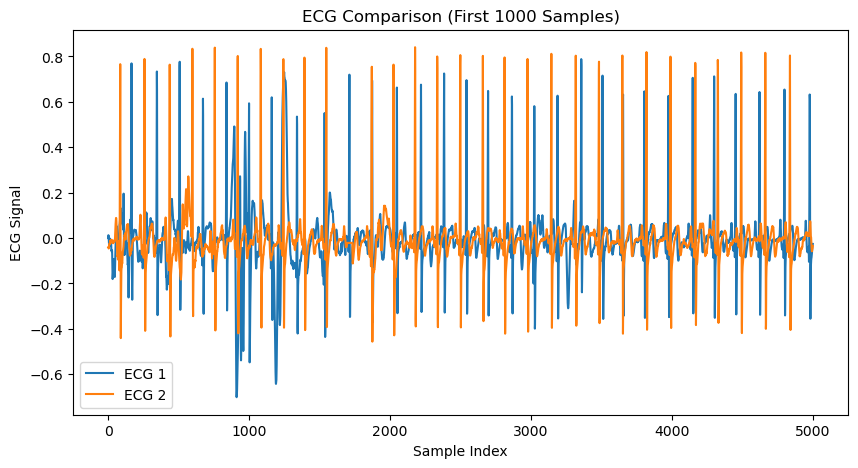

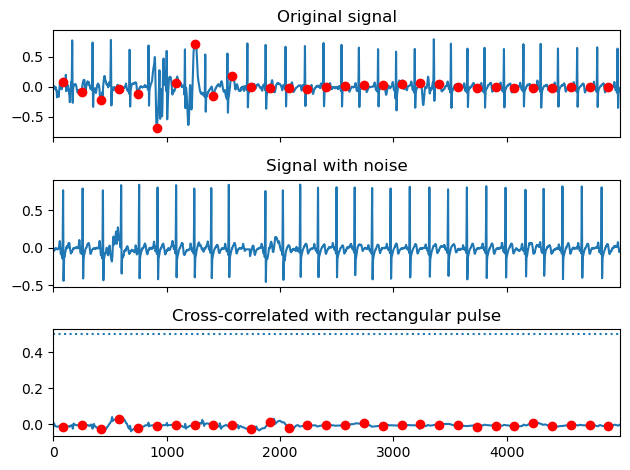

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:5000]
ecg_2 = data["S03"]["ECG"][:5000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

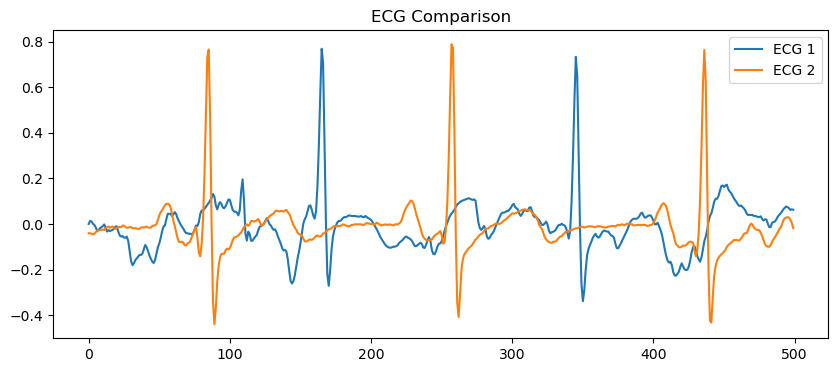

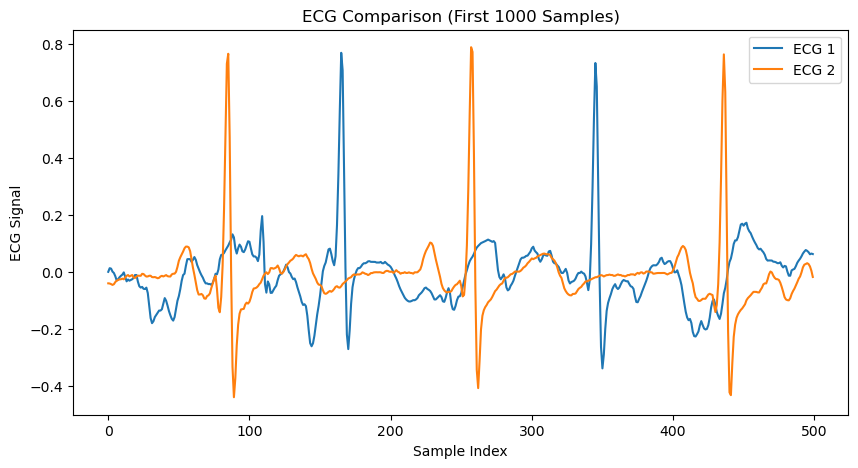

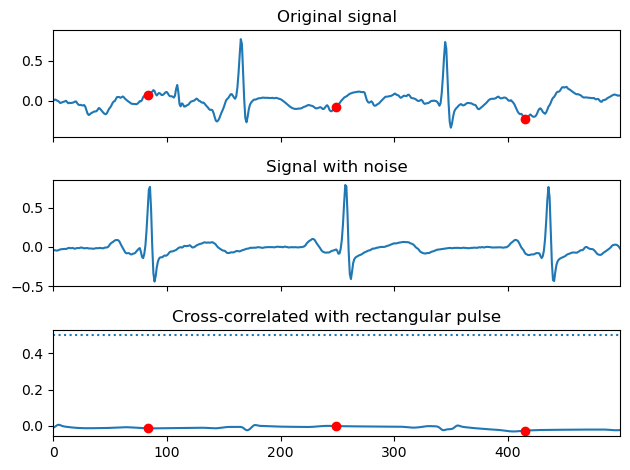

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:500]
ecg_2 = data["S03"]["ECG"][:500]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

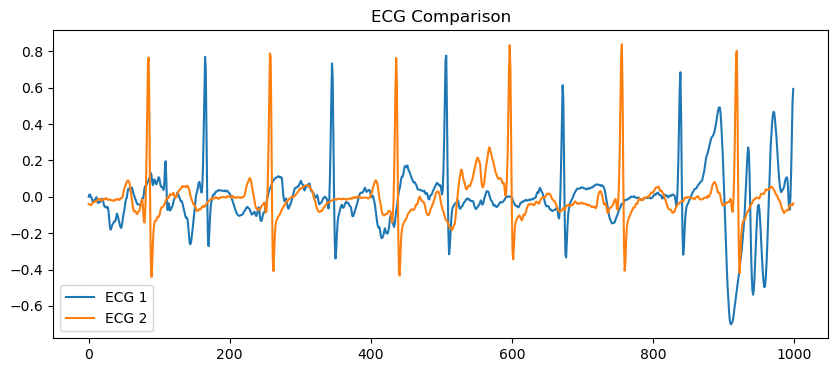

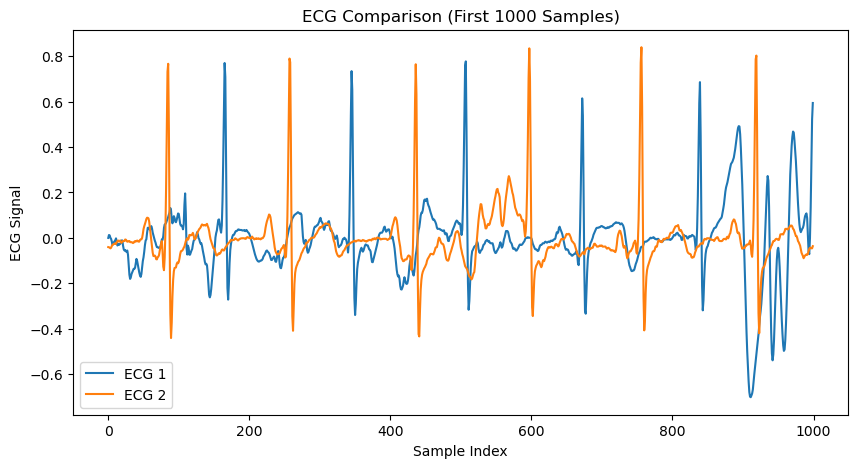

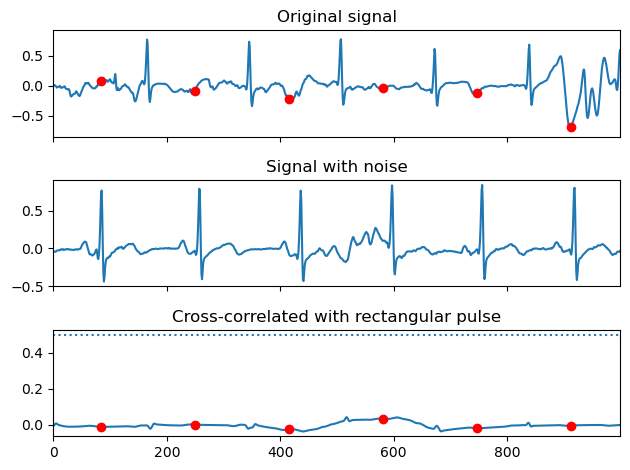

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(ecg_2)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

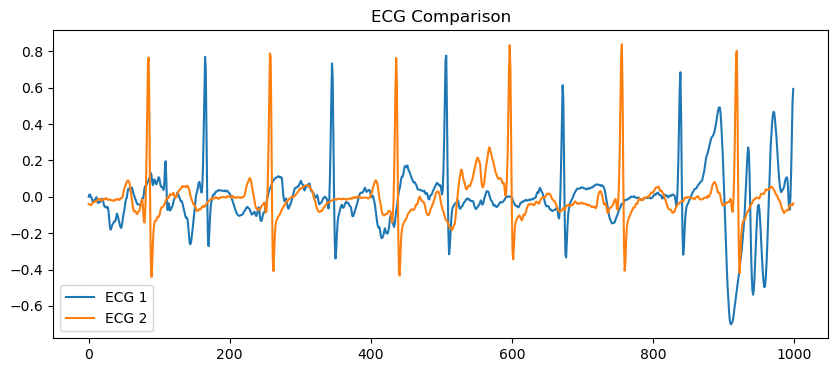

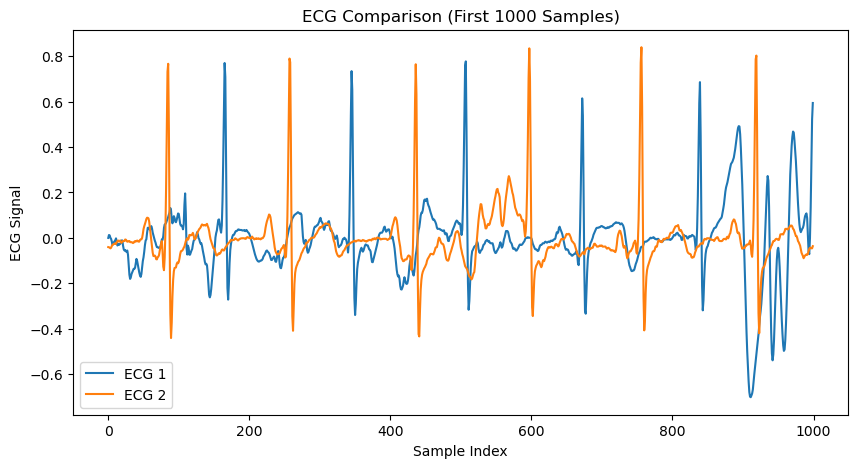

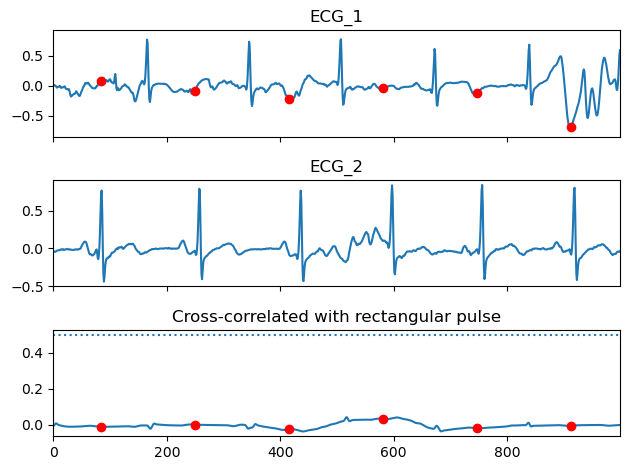

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

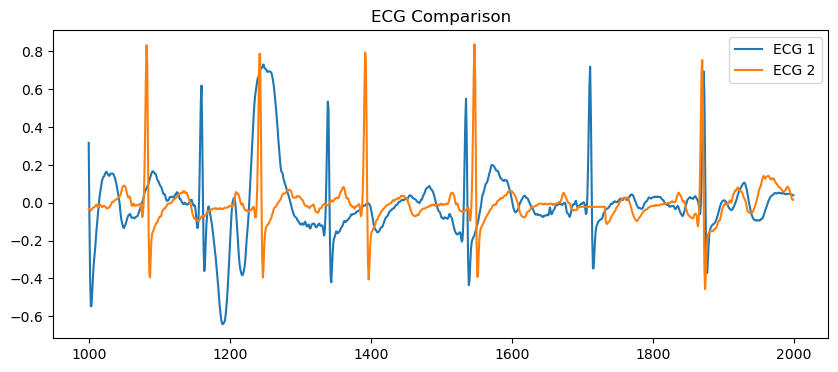

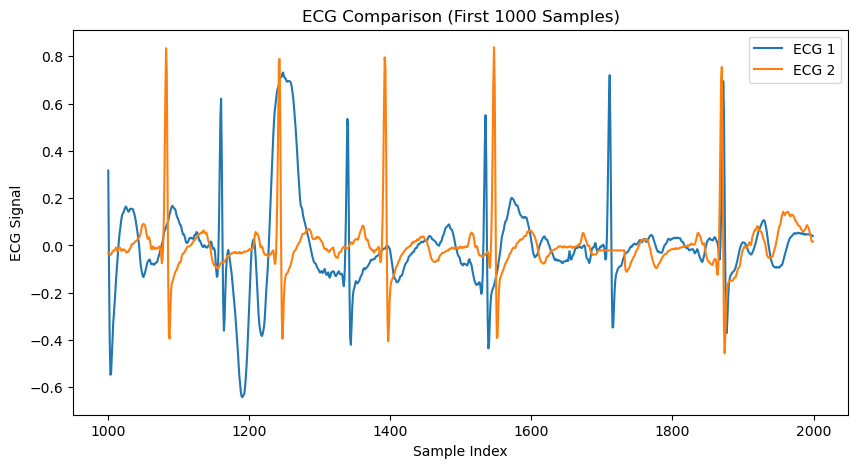

KeyError: "None of [Index([83, 249, 415, 581, 747, 913], dtype='int64')] are in the [index]"

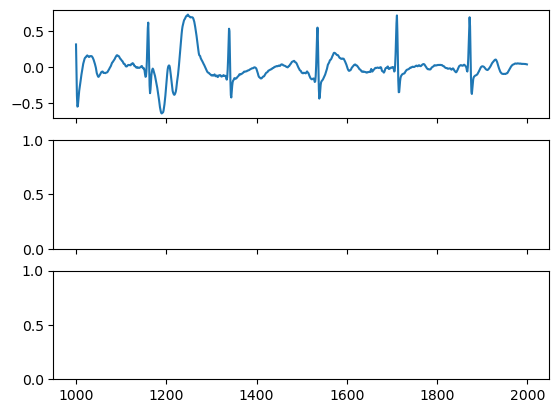

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][1000:2000]
ecg_2 = data["S03"]["ECG"][1000:2000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

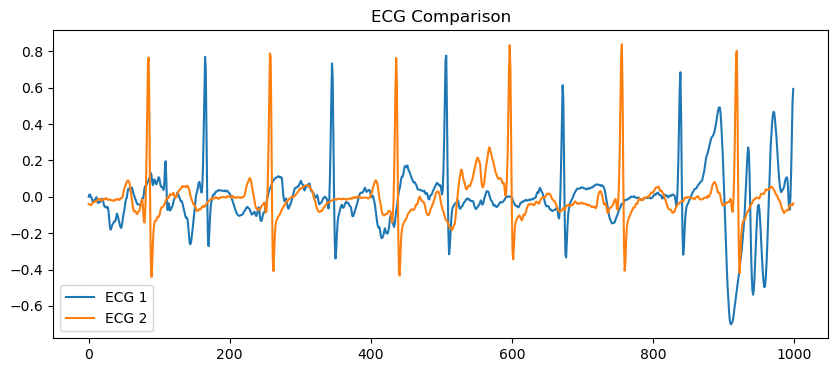

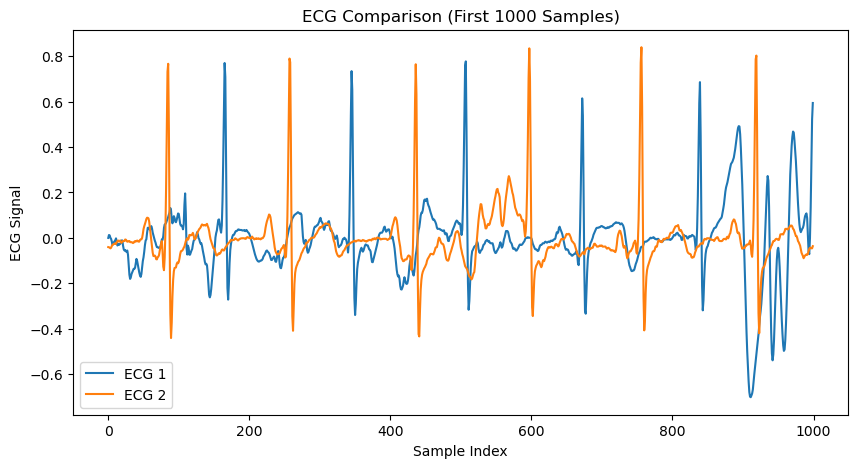

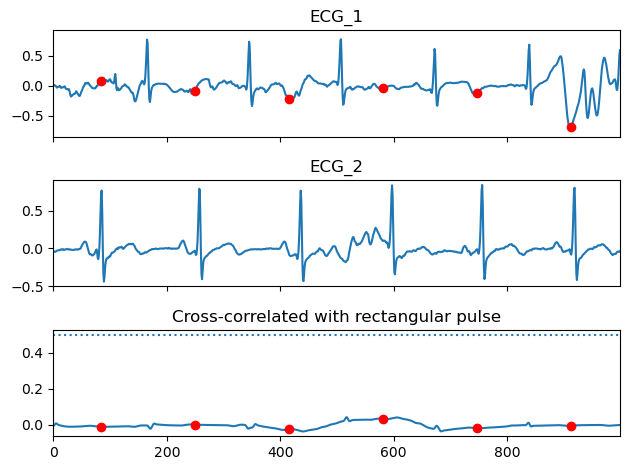

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

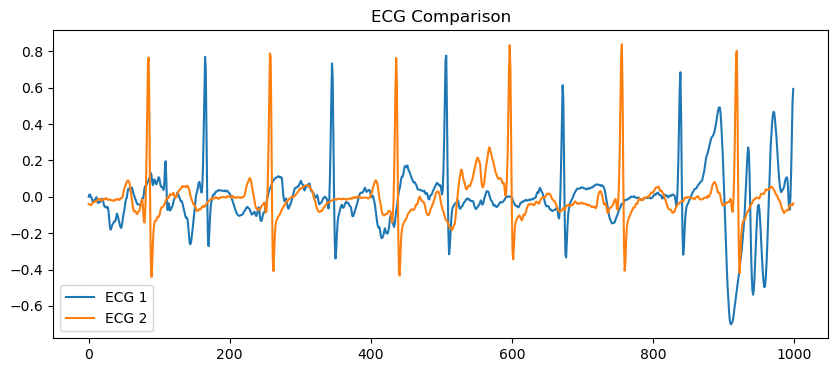

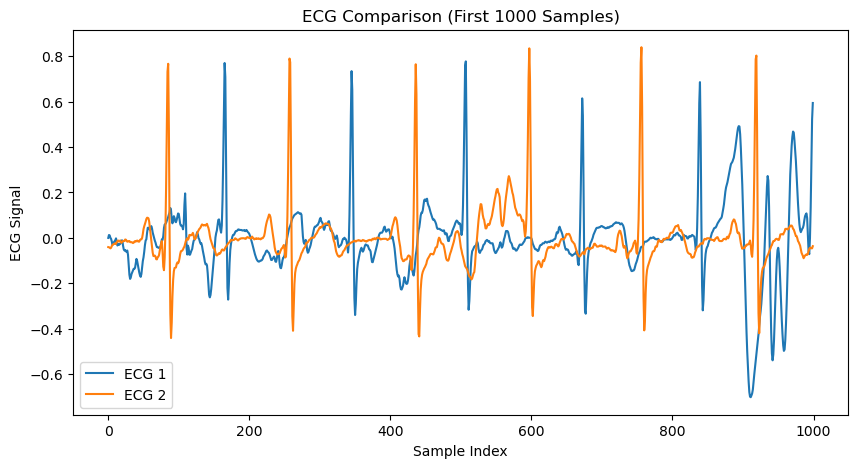

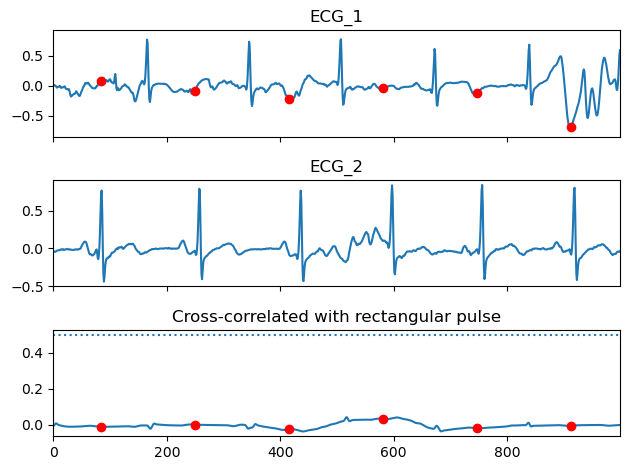

[-8.48301579e-03 -5.56637817e-03 -1.16220378e-03  3.45224541e-03
  6.30263247e-03  6.36308851e-03  4.35396401e-03  1.70018484e-03
 -5.51000872e-04 -2.10477493e-03 -3.22208955e-03 -4.10801740e-03
 -4.90487776e-03 -5.69536125e-03 -6.47845861e-03 -7.17140938e-03
 -7.82318130e-03 -8.49601985e-03 -9.13017396e-03 -9.67420473e-03
 -1.01015406e-02 -1.04553606e-02 -1.08028595e-02 -1.11365543e-02
 -1.14415984e-02 -1.17017028e-02 -1.19305340e-02 -1.20867075e-02
 -1.21684574e-02 -1.22079126e-02 -1.22171551e-02 -1.22650271e-02
 -1.22768742e-02 -1.21996359e-02 -1.21205964e-02 -1.20553066e-02
 -1.19780903e-02 -1.18842994e-02 -1.17509389e-02 -1.16802955e-02
 -1.17042667e-02 -1.17428324e-02 -1.17454350e-02 -1.16948661e-02
 -1.15790280e-02 -1.14153630e-02 -1.12176663e-02 -1.09822082e-02
 -1.07285566e-02 -1.04473224e-02 -1.01200195e-02 -9.76252601e-03
 -9.42148218e-03 -9.09340334e-03 -8.75144853e-03 -8.41043068e-03
 -8.08417154e-03 -7.72934284e-03 -7.35712090e-03 -7.04467846e-03
 -6.77735349e-03 -6.59194

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()
print(corr)

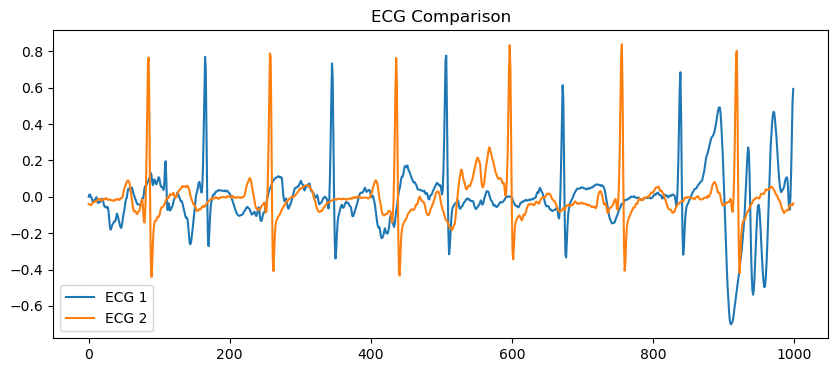

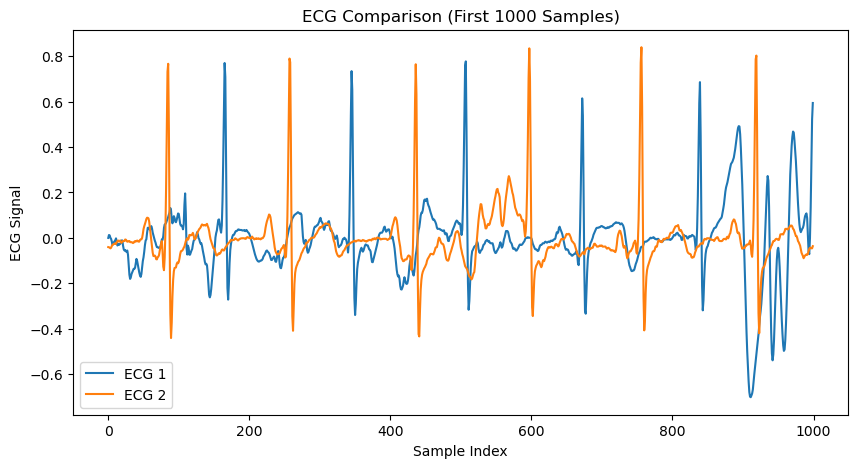

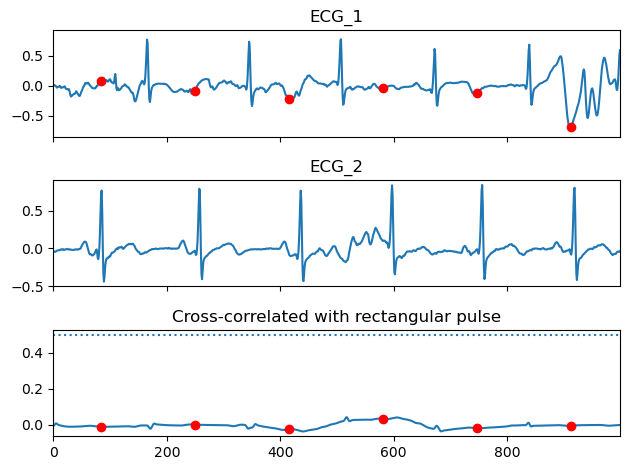

[3.45224541e-03 6.30263247e-03 6.36308851e-03 4.35396401e-03
 1.70018484e-03 1.46697813e-03 4.85076112e-03 5.33870140e-03
 4.05363138e-03 2.37571147e-03 1.18975527e-03 6.22331218e-04
 3.65405751e-04 1.88206589e-04 9.58541861e-05 4.18104918e-04
 6.02236836e-04 6.58987040e-04 6.73662039e-04 6.21831804e-04
 5.04257592e-04 3.25997510e-04 1.32045393e-04 8.93908090e-04
 2.71263231e-03 1.93262347e-03 1.58582892e-05 8.04327603e-04
 1.45850978e-03 2.07569978e-03 2.63473091e-03 3.21659871e-03
 3.86353417e-03 4.63651799e-03 5.47157571e-03 6.33975151e-03
 7.34908618e-03 8.49125119e-03 9.68394655e-03 1.09087724e-02
 1.20920630e-02 1.31929022e-02 1.42075242e-02 1.52517674e-02
 1.62440380e-02 1.69660761e-02 1.74826701e-02 1.81228659e-02
 1.91712170e-02 2.10205842e-02 2.43727388e-02 2.94606495e-02
 3.51823123e-02 3.96527338e-02 4.10591935e-02 3.86452169e-02
 3.31936185e-02 2.65209227e-02 2.10929159e-02 1.86820982e-02
 1.90479686e-02 2.08038629e-02 2.26834515e-02 2.39132758e-02
 2.46367476e-02 2.513836

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()
mask = corr > 0.0
print(corr[mask])

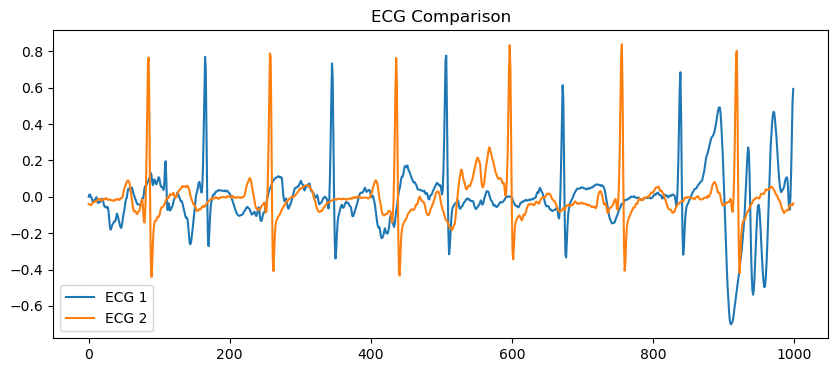

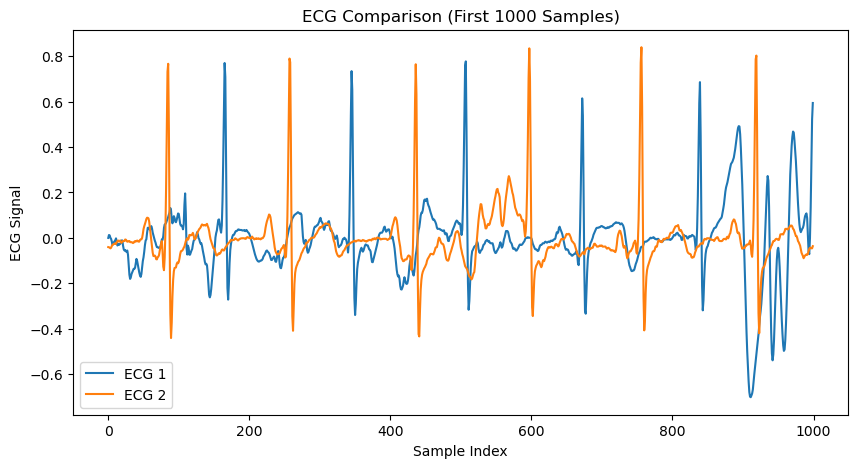

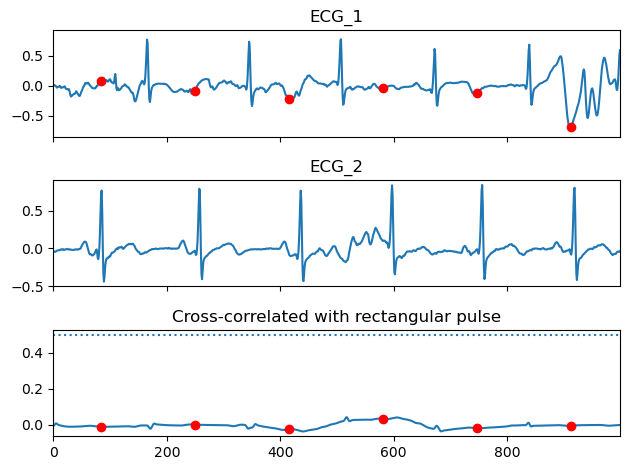

NameError: name 'show' is not defined

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()
mask = corr > 0.0
show(corr[mask])

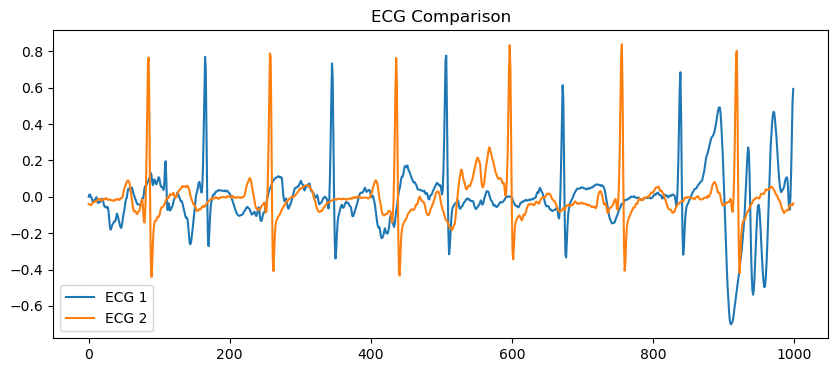

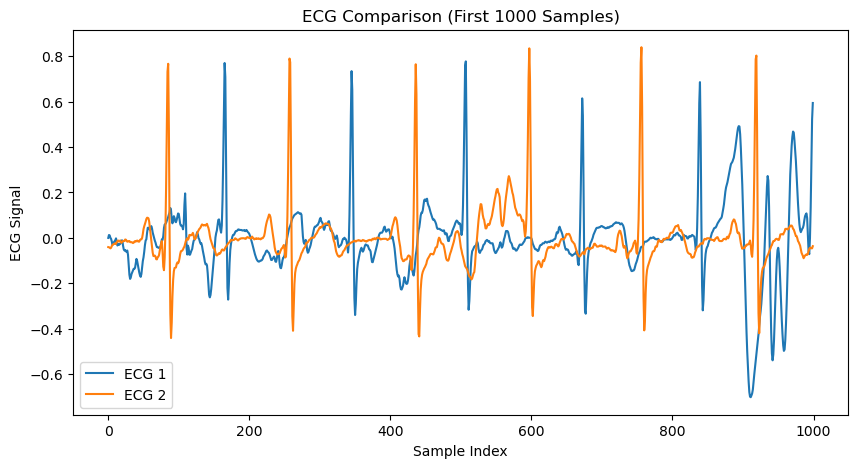

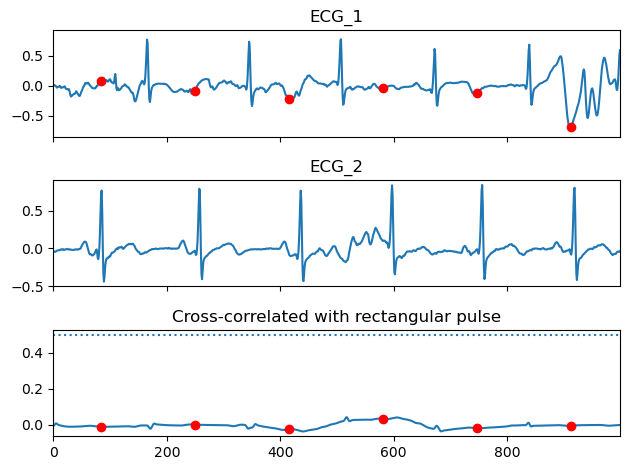

NameError: name 'pd' is not defined

In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()
# Extract indices where correlation is greater than 0
positive_indices = np.where(corr > 0)[0]  # Get indices where correlation is positive
positive_values = corr[positive_indices]  # Get corresponding correlation values

# Create a DataFrame to display as a table
df = pd.DataFrame({"Index": positive_indices, "Correlation": positive_values})

# Show the first few rows
print(df.head())  # Print a preview in the console

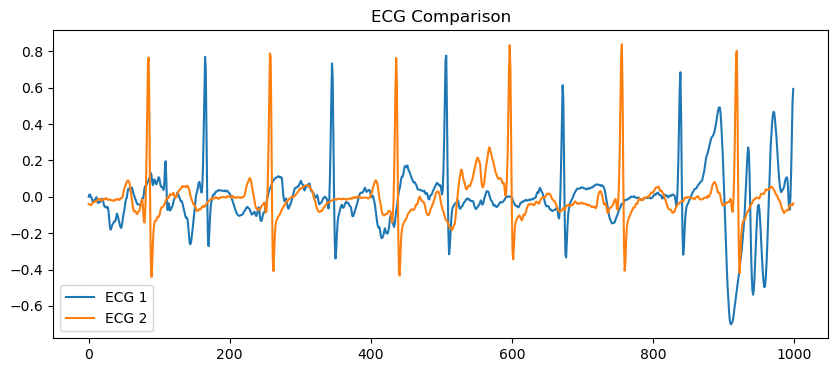

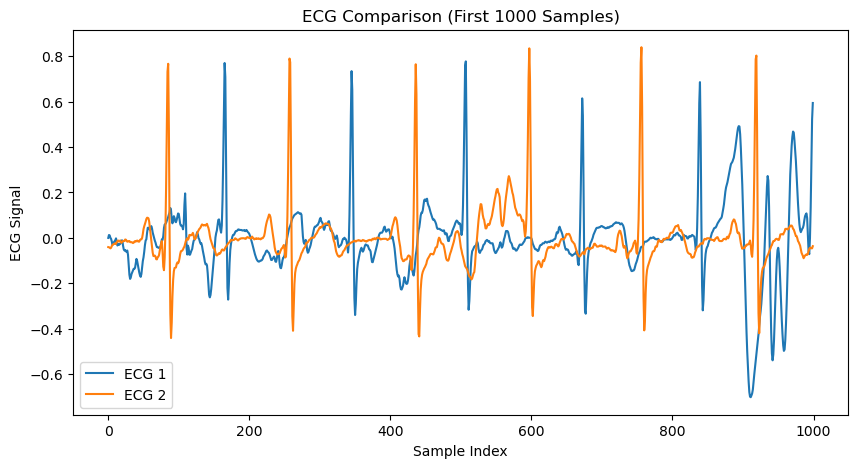

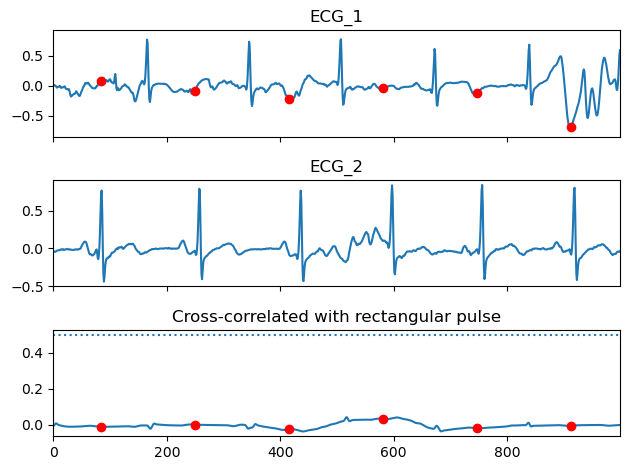

   Index  Correlation
0      3     0.003452
1      4     0.006303
2      5     0.006363
3      6     0.004354
4      7     0.001700


In [ ]:
import neurokit2 as nk
data = nk.data("bio_resting_8min_200hz")

data.keys()
#dict_keys(['S01', 'S02', 'S03', 'S04'])

data["S01"].head()
#nk.signal_plot(data["S01"]["ECG"])
#nk.signal_plot(data["S02"]["ECG"])
#nk.signal_plot(data["S03"]["ECG"])
#nk.signal_plot(data["S04"]["ECG"])

import numpy as np
from scipy.signal import correlate

ecg_1 = data["S01"]["ECG"][:1000]
ecg_2 = data["S03"]["ECG"][:1000]
correlation = correlate(ecg_1, ecg_2, mode='full')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(ecg_1, label='ECG 1')
plt.plot(ecg_2, label='ECG 2')
plt.legend()
plt.title('ECG Comparison')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ecg_1, label="ECG 1")  # Show first 1000 samples
plt.plot(ecg_2, label="ECG 2")
plt.title("ECG Comparison (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("ECG Signal")
plt.legend()
plt.show()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# sig to ecg_1 sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
# sig_noise to ecg_2 sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(ecg_2, np.ones(166), mode='same') / 166

clock = np.arange(83, len(ecg_1), 166)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(ecg_1)
ax_orig.plot(clock, ecg_1[clock], 'ro')
ax_orig.set_title('ECG_1')
ax_noise.plot(ecg_2)
ax_noise.set_title('ECG_2')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

import pandas as pd
# Extract indices where correlation is greater than 0
positive_indices = np.where(corr > 0)[0]  # Get indices where correlation is positive
positive_values = corr[positive_indices]  # Get corresponding correlation values

# Create a DataFrame to display as a table
df = pd.DataFrame({"Index": positive_indices, "Correlation": positive_values})

# Show the first few rows
print(df.head())  # Print a preview in the console

No kernel connected